In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
import scipy.constants as cste

# Scalar fields

$$T(x, y)=T_b+T_c \exp \left(-\frac{\left(x-x_c\right)^2+\left(y-y_c\right)^2}{\sigma^2}\right)+T_f \exp \left(-\frac{\left(x-x_f\right)^2+\left(y-y_f\right)^2}{\sigma^2}\right)$$

In [2]:
'''
def temp(X, Xc, Xf, sigma, Tb, Tc, Tf):
    x, y = X
    xc, yc = Xc
    xf, yf = Xf
    return Tb + Tc*np.exp(-((x-xc)**2 + (y-yc)**2)/(sigma**2)) \
            + Tf*np.exp(-((x-xf)**2 + (y-yf)**2)/(sigma**2))
'''

def temp(X, Xc, Xf, sigma, Tb, Tc, Tf):
    x, y = X
    xc, yc = Xc
    xf, yf = Xf
    return Tb + Tc*np.exp(-((x-xc)**2+(y-yc)**2)/sigma**2) \
        +Tf*np.exp(-((x-xf)**2+(y-yf)**2)/sigma**2)


'''
def temp(x,y,xc,yc,xf,yf, sigma, Tb, Tc, Tf):
    #x, y = X
    #xc, yc = Xc
    #xf, yf = Xf
    return Tb + Tc*np.exp(-((x-xc)**2+(y-yc)**2)/sigma**2) \
        +Tf*np.exp(-((x-xf)**2+(y-yf)**2)/sigma**2)
'''

Tb = 20
Tc = 100
Tf = -40

Xc = (-2, 2)
Xf = (2, -2)
sigma = 2

xmin, xmax, ymin, ymax = -5,5,-5,5


## Linspace

In [3]:
Nx, Ny = 5,3
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
Tp = np.zeros((Ny, Nx)) # Ny rows, Nx cols



for i in range(Nx): # cols
    for j in range(Ny): # rows
        Tp[j, i] = temp((x[i], y[j]), Xc, Xf, sigma, Tb, Tc, Tf)

print(x)
print(y)
print(Tp)

[-5.  -2.5  0.   2.5  5. ]
[-5.  0.  5.]
[[20.00003026 19.97376364 18.44920772 16.03946669 19.55564014]
 [23.87735037 54.46593237 28.12011699  6.40922711 18.44920772]
 [21.11089965 29.90133962 23.87735037 20.0665349  20.00003026]]


## Meshgrid

In [4]:
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

# X and Y are both 2*2 matrices. 
# Looking up the (j,i) element of both matrices will give us the our desired (x,y) coordinates
# all this to avoid an extra for loop, at the cost of memory usage

#T = temp((X,Y), Xc, Xc, sigma, Tb, Tc, Tf)
T = temp((X,Y), Xc, Xf, sigma, Tb, Tc, Tf)

print(T)


[[-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]]
[[-5. -5. -5. -5. -5.]
 [ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]]
[[20.00003026 19.97376364 18.44920772 16.03946669 19.55564014]
 [23.87735037 54.46593237 28.12011699  6.40922711 18.44920772]
 [21.11089965 29.90133962 23.87735037 20.0665349  20.00003026]]


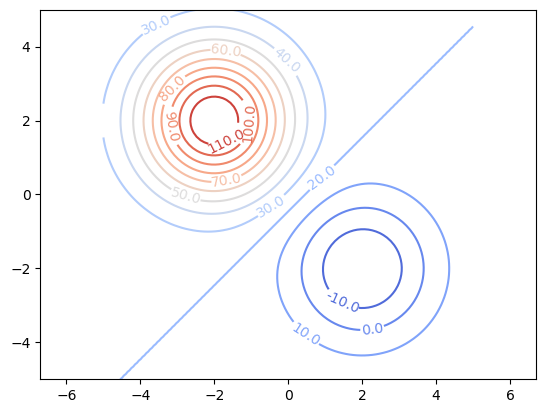

In [5]:
x_t = np.linspace(xmin, xmax, 100)
y_t = np.linspace(ymin, ymax, 100)
X_t, Y_t = np.meshgrid(x_t, y_t)

T_res = temp((X_t,Y_t), Xc, Xf, sigma, Tb, Tc, Tf)

CS = plt.contour(X_t,Y_t, T_res, 16, cmap="coolwarm")
plt.clabel(CS, fontsize=10, fmt='%1.1f')
plt.axis('equal')
plt.show()

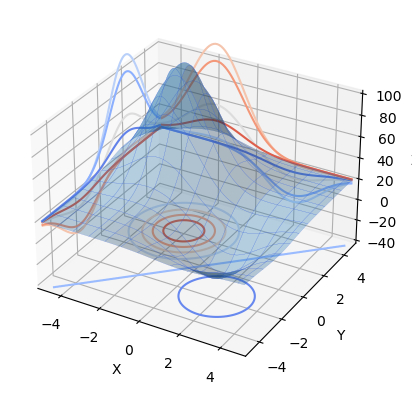

In [6]:
ax = plt.figure().add_subplot(projection='3d')
# Plot the 3D surface
ax.plot_surface(X_t, Y_t, T_res, edgecolor='royalblue', lw=0.1, rstride=8, cstride=8,
                alpha=0.3)
# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.

ax.contour(X_t, Y_t, T_res, zdir='z', offset=Tf, cmap='coolwarm')
ax.contour(X_t, Y_t, T_res, zdir='x', offset=xmin, cmap='coolwarm')
ax.contour(X_t, Y_t, T_res, zdir='y', offset=ymax, cmap='coolwarm')

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(Tf, Tc),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

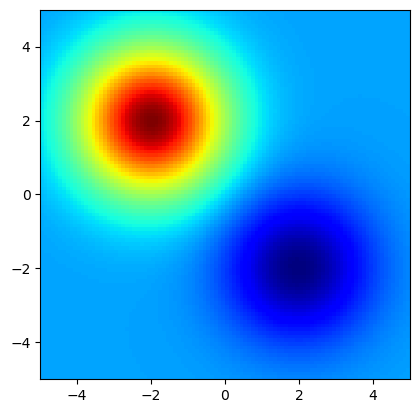

In [7]:
im = plt.imshow(T_res, origin='lower', extent=(xmin, xmax, ymin, ymax), cmap="jet")
#plt.axis('equal')
plt.show()

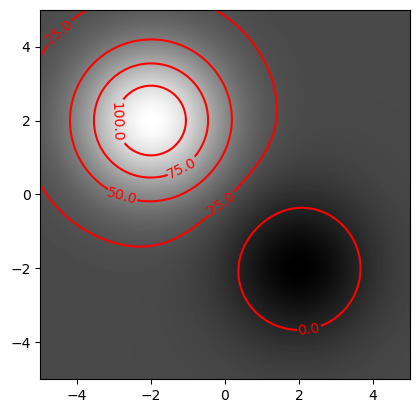

In [8]:
im = plt.imshow(T_res, interpolation="bilinear", origin="lower", cmap="gray", extent=(xmin, xmax, ymin, ymax))
CS = plt.contour(X_t, Y_t, T_res, 5, colors='r') # 5 is supposedly the vertical step between level curves
plt.clabel(CS, fontsize=10, fmt='%1.1f')
#plt.axis('equal')
plt.show()
                

## Numerical integration

$$\int_0^1 f(x) d x=\left[\frac{x^4}{4}+\frac{x^2}{2}\right]_0^1=\frac{1}{4}+\frac{1}{2}=\frac{3}{4}=0.75$$

In [9]:
def f(x):
    return x**3 + x

# we can integrate numerically between 0 and 1

res, err = quad(f, 0, 1)
print(res, err)

0.7499999999999999 8.326672684688672e-15


# Atomic Orbitals

\begin{array}{|c|c|c|}
\hline & \text { partie angulaire } & \text { partie radiale } \\
\hline \hline 1 s & \frac{1}{2 \sqrt{\pi}} & R_{10}(r)=\frac{2}{a_0^{3 / 2}} e^{-r / a_0} \\
\hline 2 s & \frac{1}{2 \sqrt{\pi}} & R_{20}(r)=\frac{1}{a_0^{3 / 2}} \frac{1}{\sqrt{2}}\left(1-\frac{r}{2 a_0}\right) e^{-r / 2 a_0} \\
\hline 3 s & \frac{1}{2 \sqrt{\pi}} & R_{30}(r)=\frac{1}{a_0^{3 / 2}} \frac{2}{\sqrt{3}}\left(1-\frac{2 r}{a_0}+\frac{4}{27}\left(\frac{r}{a_0}\right)^2\right) e^{-r / 3 a_0} \\
\hline 2 p_x & \frac{1}{2}\left(\frac{3}{\pi}\right)^{1 / 2} \frac{x}{r} & R_{21}(r)=\frac{1}{a_0^{3 / 2}} \frac{1}{2 \sqrt{6}} \frac{r}{a_0} e^{-r / 2 a_0} \\
\hline 2 p_z & \frac{1}{2}\left(\frac{3}{\pi}\right)^{1 / 2} \frac{z}{r} & R_{21}(r) \\
\hline 3 d_{x z} & \frac{1}{2}\left(\frac{15}{\pi}\right)^{1 / 2} \frac{x z}{r^2} & R_{32}(r)=\frac{1}{a_0^{3 / 2}} \frac{4}{81 \sqrt{30}}\left(\frac{r}{a_0}\right)^2 e^{-r / 3 a_0} \\
\hline 3 d_{z^2} & \frac{1}{4}\left(\frac{5}{\pi}\right)^{1 / 2} \frac{2 z^2-x^2-y^2}{r^2} & R_{32}(r) \\
\hline
\end{array}

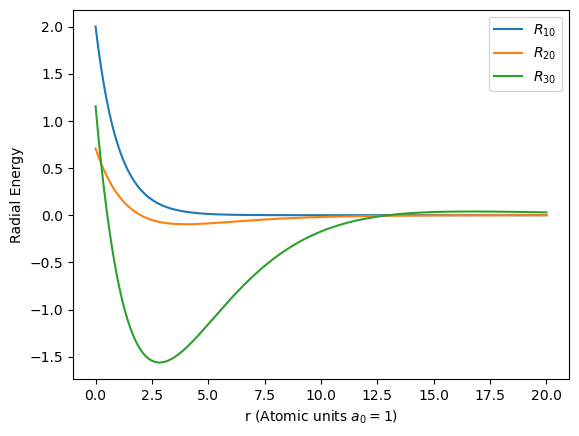

In [10]:
# working in atomic length units, a0 = 1 (bohr's radius)
r = np.linspace(0, 20, 1000)

R10 = 2*np.exp(-r)
R20 = (1/np.sqrt(2))*(1-r/2)*np.exp(-r/2)
R30 = (2/np.sqrt(3))*(1-2*r + (4/27)*(r**2))*np.exp(-r/3)

plt.plot(r, R10, label=r"$R_{10}$")
plt.plot(r, R20, label=r"$R_{20}$")
plt.plot(r, R30, label=r"$R_{30}$")
plt.legend()

plt.ylabel("Radial Energy")
plt.xlabel("r (Atomic units $a_0 = 1$)")
plt.show()

In [11]:
X_r, Z_r = np.meshgrid(np.linspace(-20, 20, 5000), np.linspace(-20, 20, 5000))
R = np.sqrt(X_r**2 + Z_r**2)

R10_im = 2*np.exp(-R)
R20_im = (1/np.sqrt(2))*(1-R/2)*np.exp(-R/2)
R30_im = (2/np.sqrt(3))*(1-2*R + (4/27)*(R**2))*np.exp(-R/3)

Text(0, 0.5, 'y')

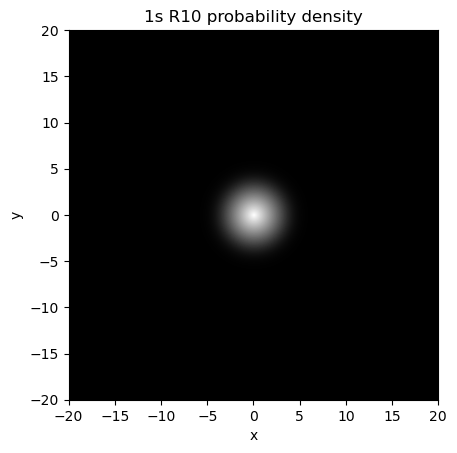

In [12]:
im = plt.imshow(np.log(R10_im**2 + 1e-3), origin="lower", cmap="gray", extent=(-20, 20, -20, 20))
# probability is proportional to energy squared (Born's rule)
# 1e-3 offset is to adjust the value at which it is black

plt.title("1s R10 probability density")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

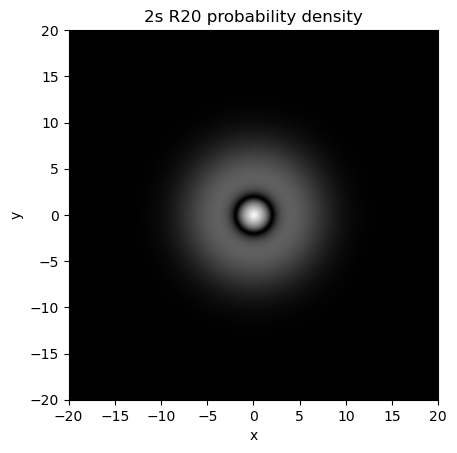

In [13]:
im = plt.imshow(np.log(R20_im**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-20, 20, -20, 20))
plt.title("2s R20 probability density")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'z')

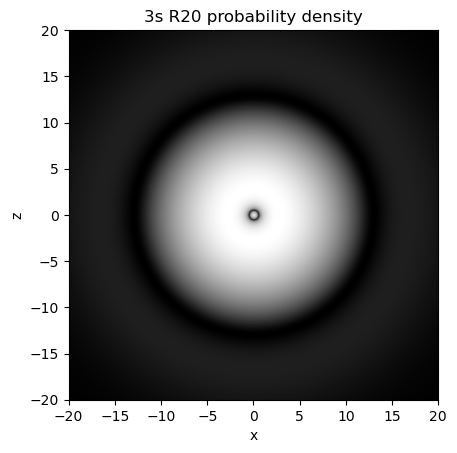

In [14]:
im = plt.imshow(np.log(R30_im**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-20, 20, -20, 20))
plt.title("3s R20 probability density")
plt.xlabel("x")
plt.ylabel("z")

In [15]:
# 2px

A_px = 1/2*np.sqrt(3/np.pi)*X_r/R
R_px = 1/(2*np.sqrt(6)) * R * np.exp(-R/2)

Text(0, 0.5, 'z')

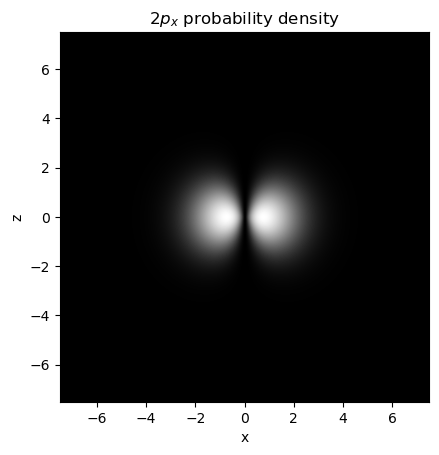

In [16]:
im = plt.imshow(np.log((A_px*R_px)**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-7.5, 7.5, -7.5, 7.5))
plt.title("$2p_x$ probability density")
plt.xlabel("x")
plt.ylabel("z")

Text(0, 0.5, 'z')

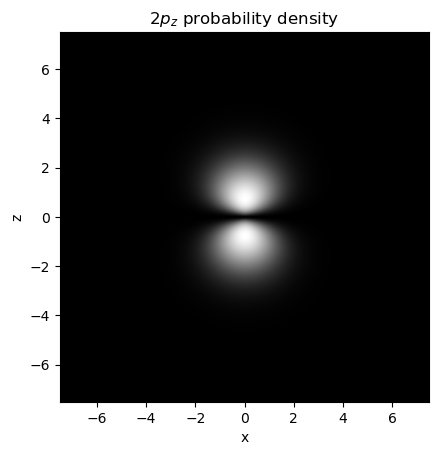

In [17]:
# 2pz

A_pz = 1/2*np.sqrt(3/np.pi)*Z_r/R
R_pz = 1/(2*np.sqrt(6)) * R * np.exp(-R/2)

im = plt.imshow(np.log((A_pz*R_pz)**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-7.5, 7.5, -7.5, 7.5))
plt.title("$2p_z$ probability density")
plt.xlabel("x")
plt.ylabel("z")

Text(0, 0.5, 'z')

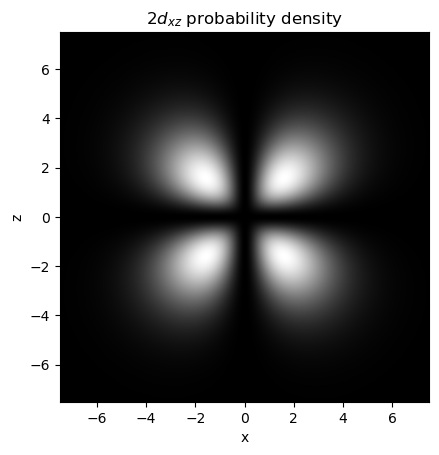

In [18]:
# 2dxz

y = 0
A_dxz = 1/2*np.sqrt(15/np.pi)*X_r*Z_r/R**2
R_dxz = 4/(81*np.sqrt(30)) * R**2 * np.exp(-R/3)

im = plt.imshow(np.log((A_dxz*R_dxz)**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-7.5, 7.5, -7.5, 7.5))
plt.title("$2d_{xz}$ probability density")
plt.xlabel("x")
plt.ylabel("z")

Text(0, 0.5, 'z')

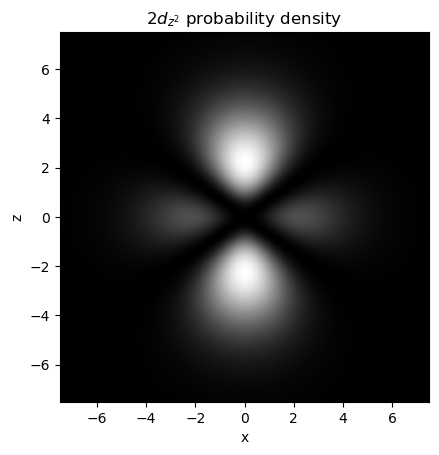

In [19]:
# 2dz2

y = 0
A_dz2 = 0.25*np.sqrt(5/np.pi)*(2*Z_r**2 - X_r**2 - y**2)/R**2
R_dz2 = R_dxz

im = plt.imshow(np.log((A_dz2*R_dz2)**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-7.5, 7.5, -7.5, 7.5))
plt.title("$2d_{z^2}$ probability density")
plt.xlabel("x")
plt.ylabel("z")

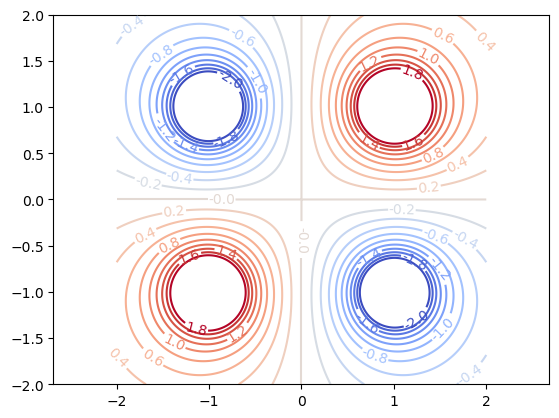

In [20]:
x_e = np.linspace(-2, 2, 1000)
y_e = np.linspace(-2, 2, 1000)

X_e, Y_e = np.meshgrid(x_e, y_e)

# (x, y, charge)
charge_pos_sign = np.array([(1, 1, 1), (1, -1, -1), (-1, -1, 1), (-1, 1, -1)])
Phi = np.zeros(shape = X_e.shape)
for i in range(len(charge_pos_sign)):
    charge_x = charge_pos_sign[i][0]
    charge_y = charge_pos_sign[i][1]
    charge = charge_pos_sign[i][2]
    Phi += charge/np.sqrt((X_e-charge_x)**2 + (Y_e-charge_y)**2)

# we can explicitely define the contour levels
contour_levels = np.arange(-2.0, 2.0, 0.2)
CS = plt.contour(X_e, Y_e, Phi, contour_levels, cmap="coolwarm")
plt.clabel(CS, fontsize=10, fmt='%1.1f')
plt.axis("equal")
plt.show()

## Uniformely charged ring

I suppose this is a ring in the Oxy plane, we also only consider the potential in this plane

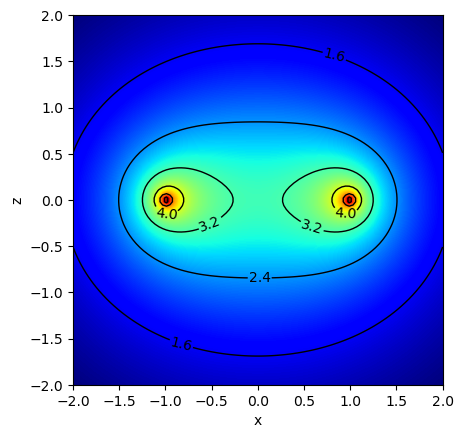

In [21]:
def d_phi(theta, x, z):
    #print(np.shape(x**2))
    #print(np.shape(z**2))
    #print(np.shape(x*np.cos(theta)))
    r = np.sqrt(x**2 + z**2 + 1 - 2*x*np.cos(theta))
    return 1/r

def phi(x, z):
    J, err = quad(d_phi, 0, cste.pi, (x, z))
    return J

phi_vect = np.vectorize(phi)

x_r = np.linspace(-2.0, 2.0, 100)
z_r = np.linspace(-2.0, 2.0, 100)


# we integrate about theta to find the contributions of each charge element
# on the ring to the potential field on the (x,z) plane. 
# This field lies in the plane and does not depend on theta

X_r, Z_r = np.meshgrid(x_r, z_r)


Phi_ring = phi_vect(X_r, Z_r)

# plotting potential on heatmap then plotting the corresponding contours

plt.rcParams["contour.linewidth"] = 1.0
 
im = plt.imshow(Phi_ring, interpolation="bilinear", origin="lower", cmap="jet", extent=(-2, 2, -2, 2))
CS = plt.contour(X_r, Z_r, Phi_ring, 6, colors='k') # 5 is supposedly the vertical step between level curves
plt.clabel(CS, fontsize=10, fmt='%1.1f')
plt.xlabel("x")
plt.ylabel("z")
#plt.axis('equal')
plt.show()

## Vector Fields

### B.2 Velocity field

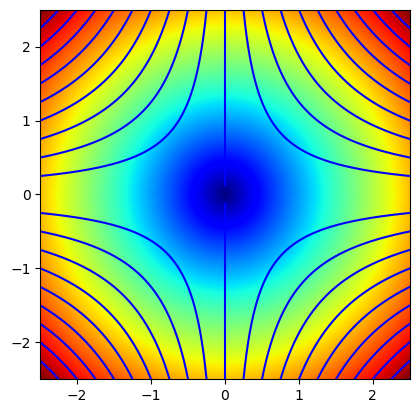

In [22]:
def velocity(X, t):
    x, y = X
    # returns [dx/dt, dy/dt]
    return [x, -y]

t = np.linspace(0, 3, 1000)

xmin, xmax, ymin, ymax = -2.5, 2.5, -2.5, 2.5
for x_ini in np.linspace(xmin, xmax, 21):
    X0_1 = [x_ini, ymin]
    X_1 = odeint(velocity, X0_1, t)
    #print(X_1.T)

    x1, y1 = X_1.T
    plt.plot(x1,y1, color="blue")

    X0_2 = [x_ini, ymax]
    X_2 = odeint(velocity, X0_2, t)
    #print(X_2.T)

    x2, y2 = X_2.T
    plt.plot(x2,y2, color="blue")

plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))


x = np.linspace(xmin, xmax, 1000)
y = np.linspace(ymin, ymax, 1000)

X, Y = np.meshgrid(x, y)
norm = np.sqrt(X**2 + Y**2)

im = plt.imshow(norm, origin='lower',cmap=plt.cm.jet, extent=(-2.5,2.5,-2.5,2.5))
#plt.axis('equal')
plt.show()
#plt.plot(x, y)

#plt.show()

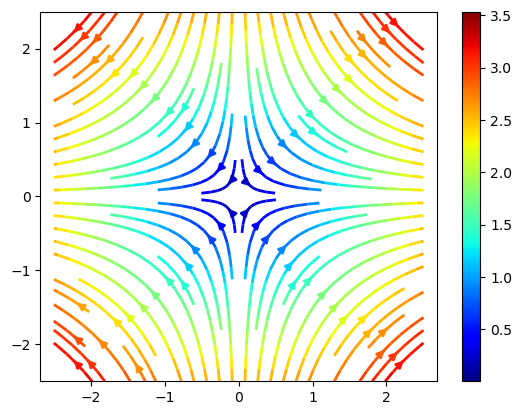

In [23]:
Vx = X
Vy = -Y
Vnorm = np.sqrt(X**2 + Y**2)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, Vx, Vy, color=Vnorm, linewidth=2, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')
plt.show()

## Fields in Electromagnetism

### Electrostatics

By manual integration

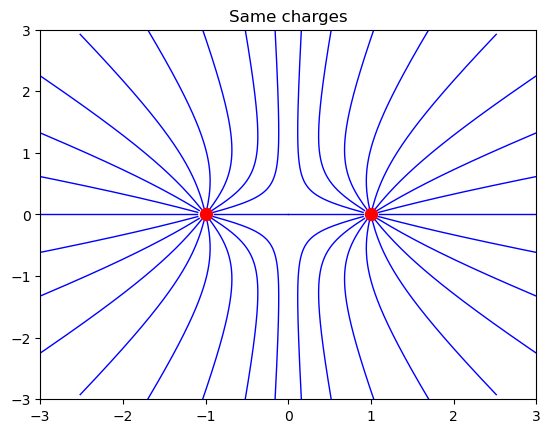

In [24]:
def e_field_lines(X, t, X_A, X_B, q_a, q_b):
    x, y = X
    xa, ya = X_A
    xb, yb = X_B

    # prevents divergence if ra, rb too small
    r0 = 0.1

    ra = np.sqrt((x-xa)**2 + (y-ya)**2)
    rb = np.sqrt((x-xb)**2 + (y-yb)**2)

    dx = q_a*(x-xa)/(ra+r0)**3 + q_b*(x-xb)/(rb+r0)**3
    dy = q_a*(y-ya)/(ra+r0)**3 + q_b*(y-yb)/(rb+r0)**3

    return [dx, dy]

u = np.linspace(0, 10, 1000) # curvilinear abssisa (since our equations are autonomous, no time dependence)


x_A, y_A = 1., 0.
x_B, y_B = -1., 0.

x_bounds = (-3, 3)
y_bounds = (-3, 3)

n_lines = 18 # fields lines per charge
r0 = 0.1

CI_A = np.zeros((n_lines, 2))
CI_B = np.zeros((n_lines, 2))


theta_step = 2*np.pi / n_lines
for i in range(0, n_lines):
    CI_A[i][0] = r0*np.cos(theta_step*i) + x_A
    CI_A[i][1] = r0*np.sin(theta_step*i) + y_A

for i in range(0, n_lines):
    CI_B[i][0] = r0*np.cos(theta_step*i) + x_B
    CI_B[i][1] = r0*np.sin(theta_step*i) + y_B

plt.scatter(x_A, y_A, c="r", zorder=5, s=75)
for X_ini in CI_A:
    X = odeint(e_field_lines, X_ini, u, args=((x_A, y_A), (x_B, y_B), 1, 1))

    x, y = X.T
    plt.plot(x,y, color="blue", linewidth=1)

plt.scatter(x_B, y_B, c="r", zorder=5, s=75)
for X_ini in CI_B:
    X = odeint(e_field_lines, X_ini, u, args=((x_A, y_A), (x_B, y_B), 1, 1))

    x, y = X.T
    plt.plot(x,y, color="blue", linewidth=1)

plt.xlim(x_bounds)
plt.ylim(y_bounds)

plt.title("Same charges")
plt.show()








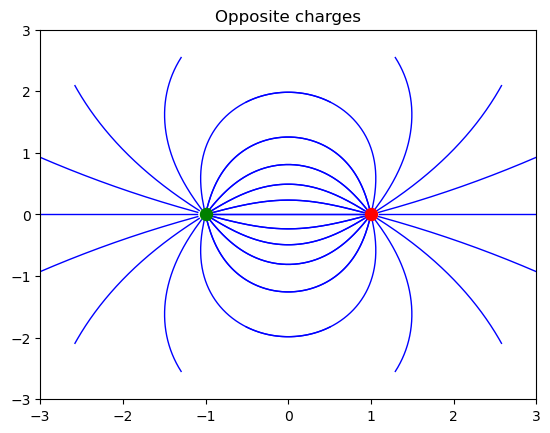

In [25]:
plt.scatter(x_A, y_A, c="r", zorder=5, s=75)
for X_ini in CI_A:
    X = odeint(e_field_lines, X_ini, u, args=((x_A, y_A), (x_B, y_B), 1, -1))

    x, y = X.T
    plt.plot(x,y, color="blue", linewidth=1)

plt.scatter(x_B, y_B, c="green", zorder=5, s=75)
for X_ini in CI_B:
    # need to invert abssisa because field goes inwards for negative charge
    # we want to travel the streamline in the opposite direction
    X = odeint(e_field_lines, X_ini, -u, args=((x_A, y_A), (x_B, y_B), 1, -1))

    x, y = X.T
    plt.plot(x,y, color="blue", linewidth=1)
    

plt.xlim(x_bounds)
plt.ylim(y_bounds)

plt.title("Opposite charges")
plt.show()


Using streamlines

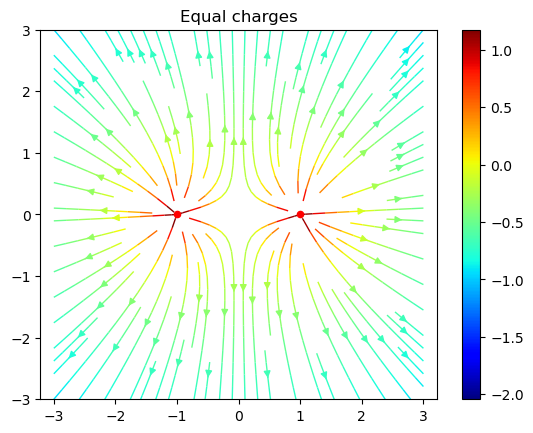

In [26]:
e_field_vect = np.vectorize(e_field_lines)

x = np.linspace(x_bounds[0], x_bounds[1], 1000)
y = np.linspace(y_bounds[0], y_bounds[1], 1000)

X, Y = np.meshgrid(x,y)


q_A, q_B = 1, 1





R_A = np.sqrt((X-x_A)**2 + (Y-y_A)**2)
R_B = np.sqrt((X-x_B)**2 + (Y-y_B)**2)
E_y = q_A*(Y-y_A)/(R_A+r0)**3 + q_B*(Y-y_B)/(R_B+r0)**3
E_x= q_A*(X-x_A)/(R_A+r0)**3 + q_B*(X-x_B)/(R_B+r0)**3
#Ex, Ey = e_field_vect([X, Y], t, (x_A, y_A), (x_B, y_B), 1, 1)

E_norm = np.sqrt(E_x**2 + E_y**2)#q_A/(R_A)**2 + q_B/(R_B)**2

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, E_x, E_y, color=np.log10(E_norm), linewidth=1, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')

plt.title("Equal charges")

plt.scatter(x_A, y_A, c="r", zorder=5, s=20)
plt.scatter(x_B, y_B, c="r", zorder=5, s=20)
plt.show()


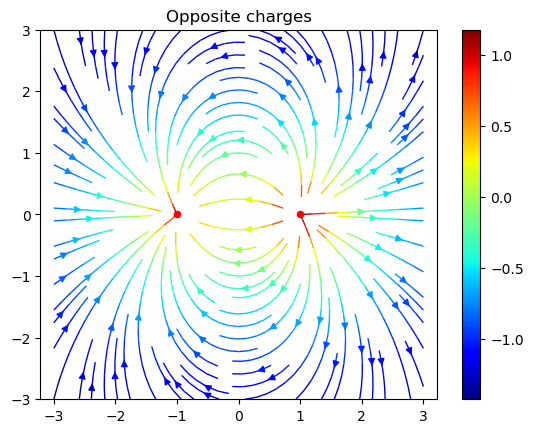

In [27]:
q_A, q_B = 1, -1


R_A = np.sqrt((X-x_A)**2 + (Y-y_A)**2)
R_B = np.sqrt((X-x_B)**2 + (Y-y_B)**2)
E_y = q_A*(Y-y_A)/(R_A+r0)**3 + q_B*(Y-y_B)/(R_B+r0)**3
E_x= q_A*(X-x_A)/(R_A+r0)**3 + q_B*(X-x_B)/(R_B+r0)**3
#Ex, Ey = e_field_vect([X, Y], t, (x_A, y_A), (x_B, y_B), 1, 1)

E_norm = np.sqrt(E_x**2 + E_y**2)#q_A/(R_A)**2 + q_B/(R_B)**2

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, E_x, E_y, color=np.log10(E_norm), linewidth=1, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')

plt.title("Opposite charges")

plt.scatter(x_A, y_A, c="r", zorder=5, s=20)
plt.scatter(x_B, y_B, c="r", zorder=5, s=20)
plt.show()

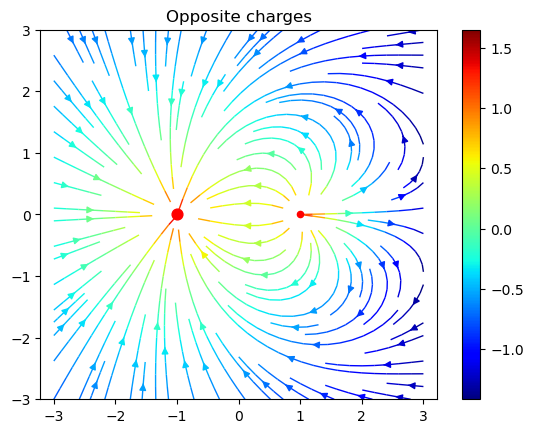

In [28]:
q_A, q_B = 1, -3


R_A = np.sqrt((X-x_A)**2 + (Y-y_A)**2)
R_B = np.sqrt((X-x_B)**2 + (Y-y_B)**2)
E_y = q_A*(Y-y_A)/(R_A+r0)**3 + q_B*(Y-y_B)/(R_B+r0)**3
E_x= q_A*(X-x_A)/(R_A+r0)**3 + q_B*(X-x_B)/(R_B+r0)**3
#Ex, Ey = e_field_vect([X, Y], t, (x_A, y_A), (x_B, y_B), 1, 1)

E_norm = np.sqrt(E_x**2 + E_y**2)#q_A/(R_A)**2 + q_B/(R_B)**2

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, E_x, E_y, color=np.log10(E_norm), linewidth=1, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')

plt.title("Opposite charges")

plt.scatter(x_A, y_A, c="r", zorder=5, s=20)
plt.scatter(x_B, y_B, c="r", zorder=5, s=60)
plt.show()

## Magnetostatics

[]


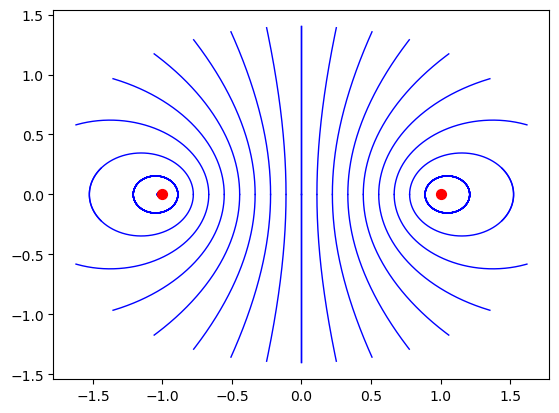

In [29]:
def dBx(theta, x, z, a):
        return z*np.cos(theta)/(x**2 + z**2 + a**2 - 2*a*x*np.cos(theta) + 0.01)**(3/2) 
    
def dBz(theta, x, z, a):
    return (a - x*np.cos(theta))/(x**2 + z**2 + a**2 - 2*a*x*np.cos(theta) + 0.01)**(3/2)
    

def mag_field_lines(X, t, a, e):
    x, z = X

    Bx, err = quad(dBx, 0, np.pi, (x, z, a))
    Bz, err = quad(dBz, 0, np.pi, (x, z, a))

    return [Bx, Bz]

a = 1
u_mag = np.linspace(0, 1, 1000)
CI = np.array([[x, 0] for x in np.linspace(0, 1, 10)])
#print(len(CI))
sols = []
plt.scatter(a, 0, c="r", zorder=5, s=50)
plt.scatter(-a, 0, c="r", zorder=5, s=50)
print(sols)
c = 0
for X_ini in CI:
    X = odeint(mag_field_lines, X_ini, u_mag, args=(a, 0))
    x, y = X.T
    sub = (x, y)
    sols.append(sub)

    #print(len(x), len(y))
    #sols[c][0] = x
    #sols[c][1] = y
    plt.plot(x,y, color="blue", linewidth=1)

    plt.plot(x, -y, color="blue", linewidth=1)
    
    plt.plot(-x, y, color="blue", linewidth=1)

    plt.plot(-x, -y, color="blue", linewidth=1)

    c += 1
plt.show()
    

In [30]:
print(sols[0][0])

[0.00000000e+00 1.26247932e-22 3.04317708e-22 5.78226033e-22
 7.65499277e-22 1.53954843e-21 2.48063630e-21 3.17903267e-21
 3.80436366e-21 4.74677750e-21 6.00115747e-21 7.37261254e-21
 8.71871627e-21 1.03756450e-20 1.25128166e-20 1.38206703e-20
 1.43036255e-20 1.43669341e-20 1.47798429e-20 1.65281769e-20
 1.84493336e-20 1.99977539e-20 2.13054333e-20 2.25816432e-20
 2.41129308e-20 2.59308337e-20 2.75514267e-20 2.89021776e-20
 2.99161168e-20 3.05187205e-20 3.06642604e-20 3.08467509e-20
 3.14818774e-20 3.29174484e-20 3.55555279e-20 3.98524355e-20
 4.62048990e-20 5.25192849e-20 5.94381128e-20 6.64555028e-20
 7.30500983e-20 7.87506698e-20 8.41856497e-20 8.96153465e-20
 9.50588741e-20 1.00539931e-19 1.06071923e-19 1.11643091e-19
 1.17201635e-19 1.22642582e-19 1.28278837e-19 1.34497153e-19
 1.41374892e-19 1.48950811e-19 1.57215416e-19 1.66101316e-19
 1.75473577e-19 1.85120082e-19 1.95016392e-19 2.05578384e-19
 2.16771231e-19 2.28506025e-19 2.40653928e-19 2.53042145e-19
 2.65449897e-19 2.776043

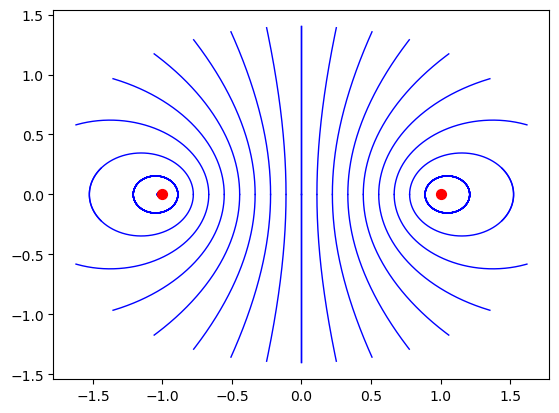

In [31]:
plt.scatter(a, 0, c="r", zorder=5, s=50)
plt.scatter(-a, 0, c="r", zorder=5, s=50)
for sol in sols:

    x, y = sol
    plt.plot(x,y, color="blue", linewidth=1)

    plt.plot(x, -y, color="blue", linewidth=1)
    
    plt.plot(-x, y, color="blue", linewidth=1)

    plt.plot(-x, -y, color="blue", linewidth=1)

## TD 2: Waves

### A.1 Monochromatic waves

1. Parabolic motion video

In [32]:
import pylab
import os

g = 10
v0 = 10
alpha = np.pi/4

Nframes = 20 # no. of images
tini = 0 # initial time
tfini = 1.4 # final time
tstep = (tfini-tini)/Nframes
Xmin, Xmax, Ymin, Ymax = 0, 12, 0, 3

for n in range(Nframes):
    t = tini + n*tstep
    y = -1/2*g*t**2 + v0*np.sin(alpha)*t
    x = v0*np.cos(alpha)*t
    pylab.plot(x, y, 'o', color='b')
    if n == (Nframes-1):
        pylab.text(6, 2, "Boum !", fontsize=20)
    pylab.axis([Xmin, Xmax, Ymin, Ymax])
    filename = 'figs/fichierTemp'+str('%02d' %n)+'.pdf' # creating file for each frame
    pylab.savefig(filename)
    print(f"Nplot = {n}")
    pylab.clf()

# assemble images into an animation
cmd = "convert -delay 50 -loop 0 figs/fichierTemp*.pdf figs/TrajectoireBoulet.gif"#f"convert -delay 50 -loop 0 {filename} {gif_filename}"
os.system(cmd)
os.system(f"rm figs/fichierTemp*.pdf")
print("Its done!")

Nplot = 0
Nplot = 1
Nplot = 2
Nplot = 3
Nplot = 4
Nplot = 5
Nplot = 6
Nplot = 7
Nplot = 8
Nplot = 9
Nplot = 10
Nplot = 11
Nplot = 12
Nplot = 13
Nplot = 14
Nplot = 15
Nplot = 16
Nplot = 17
Nplot = 18
Nplot = 19
Its done!


<Figure size 640x480 with 0 Axes>

#### Ex. 12 Progressive and stationary waves

1. $\psi(x, t) = A\cos(\omega t - k x) = A\cos(\frac{2\pi}{T} t - \frac{2\pi}{\lambda} x)$

$\text{phase speed} = \frac{\omega}{k} = \frac{\lambda}{T}$

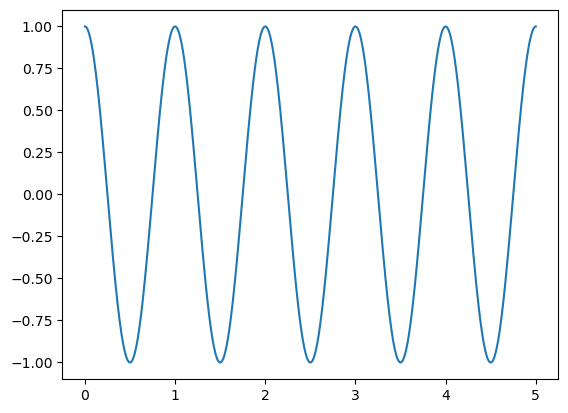

In [33]:
T = 1
lamda = 1
A = 1

omega = 2*np.pi/T
k = 2*np.pi/lamda

x = np.linspace(0, 5, 1000)
psi_t0 = A*np.cos(-k*x)

pylab.plot(x, psi_t0)

### Progressive

In [34]:
t_range = np.linspace(0, 1, 15)
Xmin, Xmax, Ymin, Ymax = -6, 6, 1.2, 1.2

for i in range(len(t_range)):
    t = t_range[i]
    psi = A*np.cos(omega*t - k*x)
    pylab.plot(x, psi)
    #pylab.axis([Xmin, Xmax, Ymin, Ymax])
    filename = 'figs/fichierTemp'+str('%02d' %i)+'.pdf' # creating file for each frame
    pylab.savefig(filename)
    print(f"Nplot = {i}")
    pylab.clf()
# assemble images into an animation
cmd = "convert -delay 50 -loop 0 figs/fichierTemp*.pdf figs/wave_pro.gif"#f"convert -delay 50 -loop 0 {filename} {gif_filename}"
os.system(cmd)
os.system(f"rm figs/fichierTemp*.pdf")
print("Its done!")

Nplot = 0
Nplot = 1
Nplot = 2
Nplot = 3
Nplot = 4
Nplot = 5
Nplot = 6
Nplot = 7
Nplot = 8
Nplot = 9
Nplot = 10
Nplot = 11
Nplot = 12
Nplot = 13
Nplot = 14
Its done!


<Figure size 640x480 with 0 Axes>

### Regressive

In [35]:
for i in range(len(t_range)):
    t = t_range[i]
    psi = A*np.cos(omega*t + k*x)
    pylab.plot(x, psi)
    #pylab.axis([Xmin, Xmax, Ymin, Ymax])
    filename = 'figs/fichierTemp'+str('%02d' %i)+'.pdf' # creating file for each frame
    pylab.savefig(filename)
    print(f"Nplot = {i}")
    pylab.clf()
# assemble images into an animation
cmd = "convert -delay 50 -loop 0 figs/fichierTemp*.pdf figs/wave_reg.gif"#f"convert -delay 50 -loop 0 {filename} {gif_filename}"
os.system(cmd)
os.system(f"rm figs/fichierTemp*.pdf")
print("Its done!")

Nplot = 0
Nplot = 1
Nplot = 2
Nplot = 3
Nplot = 4
Nplot = 5
Nplot = 6
Nplot = 7
Nplot = 8
Nplot = 9
Nplot = 10
Nplot = 11
Nplot = 12
Nplot = 13
Nplot = 14
Its done!


<Figure size 640x480 with 0 Axes>

I'll work on the stationary wave later, I don't want to work boundary conditions out

In [36]:
phase = 0
t_range = np.linspace(0, 0.5, 15)
Xmin, Xmax, Ymin, Ymax = 0, 6, -2, 2
for i in range(len(t_range)):
    t = t_range[i]
    psi_1 = A*np.cos(omega*t - k*x)
    psi_2 = A*np.cos(omega*t + k*x + phase)
    psi = psi_1 + psi_2
    pylab.plot(x, psi)
    pylab.axis([Xmin, Xmax, Ymin, Ymax])
    filename = 'figs/fichierTemp'+str('%02d' %i)+'.pdf' # creating file for each frame
    pylab.savefig(filename)
    print(f"Nplot = {i}")
    pylab.clf()
# assemble images into an animation
cmd = "convert -delay 50 -loop 0 figs/fichierTemp*.pdf figs/wave_statio.gif"#f"convert -delay 50 -loop 0 {filename} {gif_filename}"
os.system(cmd)
os.system(f"rm figs/fichierTemp*.pdf")
print("Its done!")

Nplot = 0
Nplot = 1
Nplot = 2
Nplot = 3
Nplot = 4
Nplot = 5
Nplot = 6
Nplot = 7
Nplot = 8
Nplot = 9
Nplot = 10
Nplot = 11
Nplot = 12
Nplot = 13
Nplot = 14
Its done!


<Figure size 640x480 with 0 Axes>

## A.2 Wave packets

### Ex. 13 Superposition of 2 waves

1. $\psi_1(x, t) = A\cos(2\pi f_1 t - \frac{2\pi f_1}{v_1} x)$ Same thing for $\psi_2$

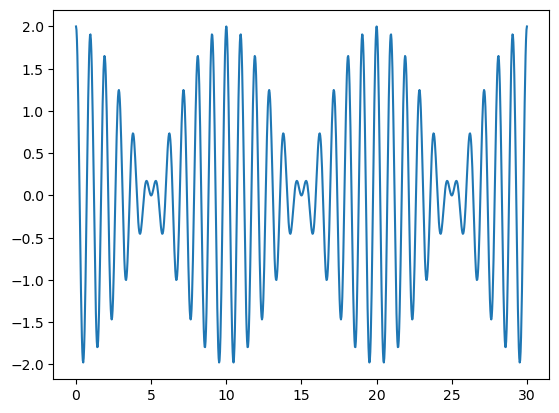

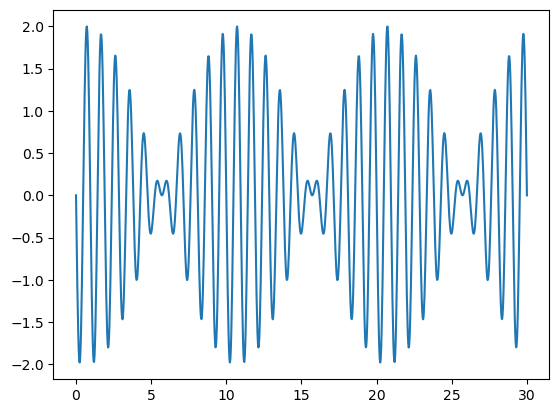

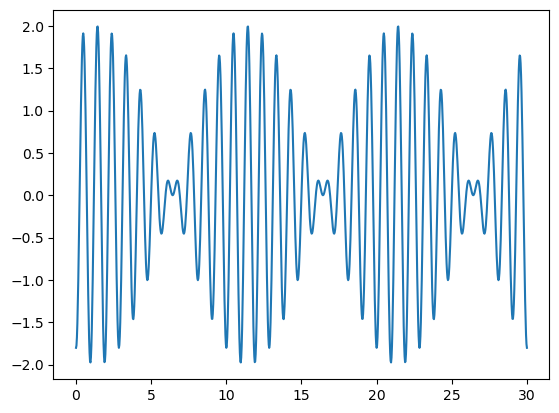

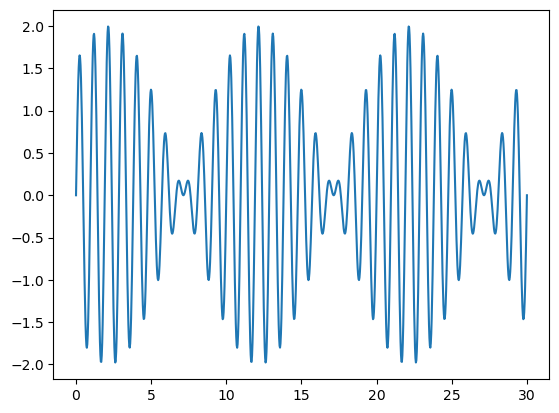

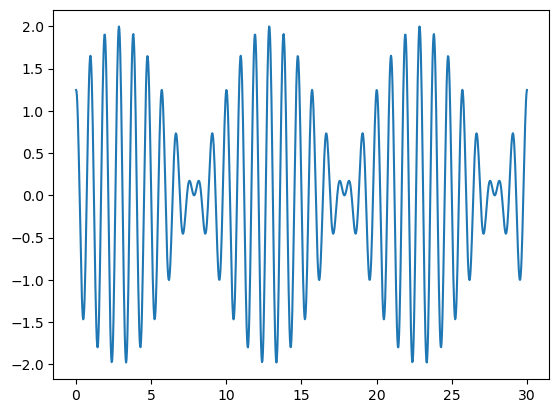

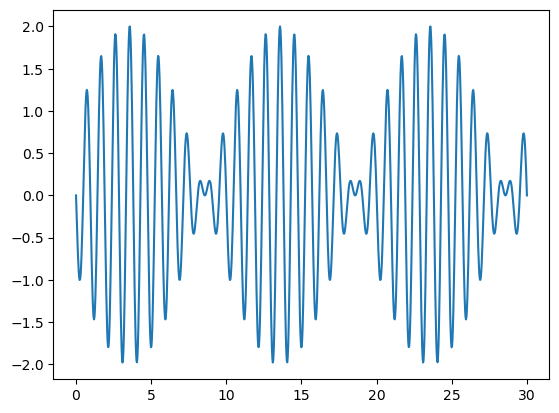

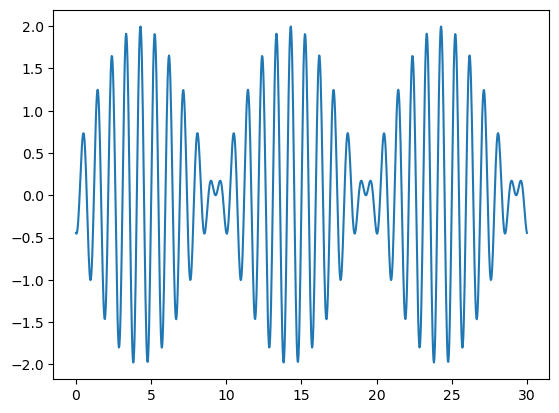

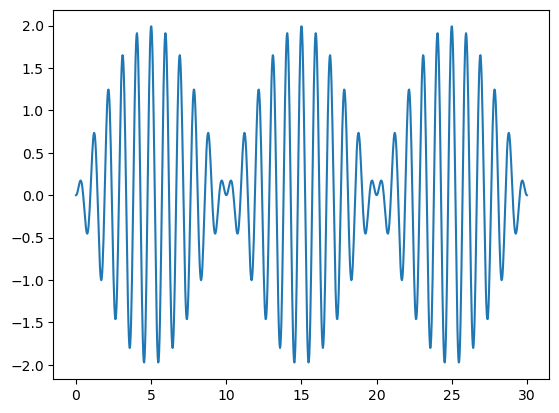

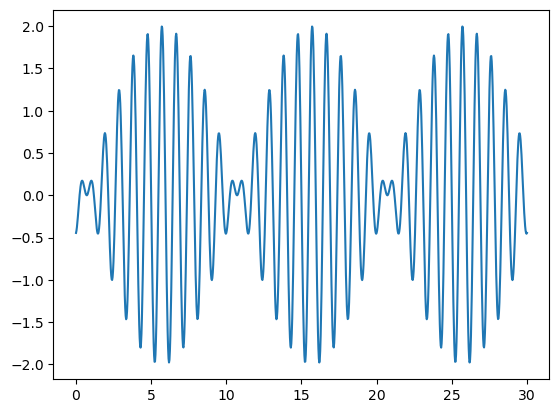

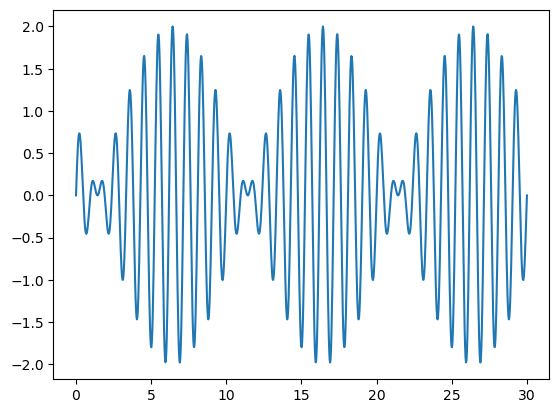

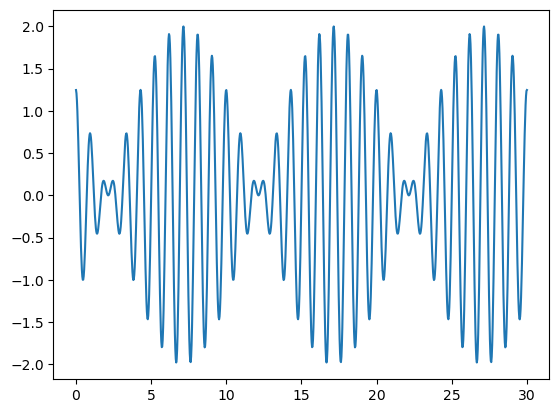

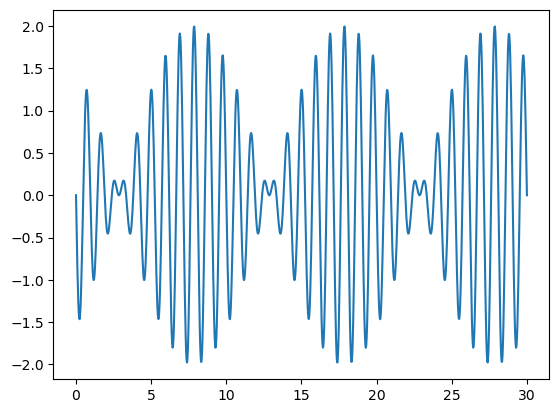

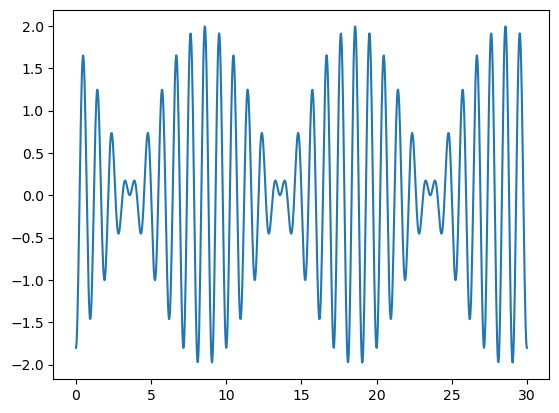

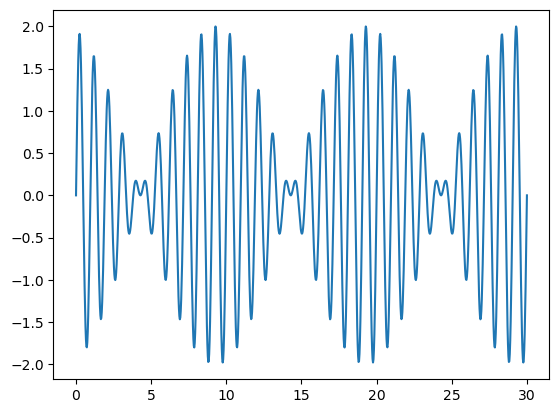

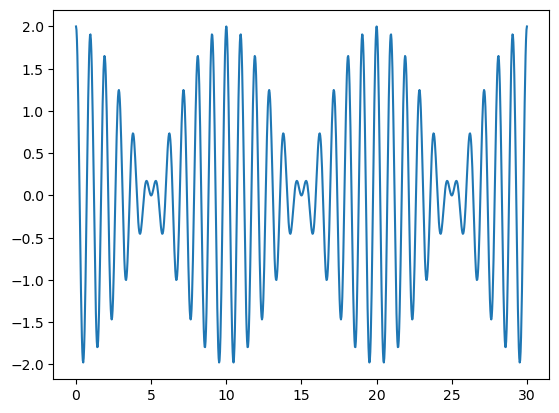

<Figure size 640x480 with 0 Axes>

In [37]:
v1 = 1
v2 = 1

f1 = 1
f2 = 1.1

x = np.linspace(0, 30, 1000)
t_range = np.linspace(0, 10, 15)

for i in range(len(t_range)):
    t = t_range[i]
    psi_1 = A*np.cos(2*np.pi*f1*(t - 1/v1*x))
    psi_2 = A*np.cos(2*np.pi*f2*(t - 1/v2*x))
    psi = psi_1 + psi_2
    plt.plot(x, psi)
    plt.show()
    plt.clf()
    

In [38]:
Xmin, Xmax, Ymin, Ymax = 0, 30, -2, 2
x = np.linspace(0, 30, 1000)
t_range = np.linspace(0, 10, 8)

for i in range(len(t_range)):
    t = t_range[i]
    psi_1 = A*np.cos(2*np.pi*f1*(t - 1/v1*x))
    psi_2 = A*np.cos(2*np.pi*f2*(t - 1/v2*x))
    psi = psi_1 + psi_2
    pylab.plot(x, psi)
    pylab.axis([Xmin, Xmax, Ymin, Ymax])

    filename = 'figs/fichierTemp'+str('%02d' %i)+'.pdf' # creating file for each frame
    pylab.savefig(filename)
    print(f"Nplot = {i}")
    pylab.clf()

# assemble images into an animation
cmd = "convert -delay 50 -loop 0 figs/fichierTemp*.pdf figs/wave_packets_v1=v2.gif"#f"convert -delay 50 -loop 0 {filename} {gif_filename}"
os.system(cmd)
os.system(f"rm figs/fichierTemp*.pdf")
print("Its done!")

Nplot = 0
Nplot = 1
Nplot = 2
Nplot = 3
Nplot = 4
Nplot = 5
Nplot = 6
Nplot = 7
Its done!


<Figure size 640x480 with 0 Axes>

In [39]:
v1 = 1
v2 = 1.3

f1 = 1
f2 = 1.1

Xmin, Xmax, Ymin, Ymax = 0, 30, -2, 2
x = np.linspace(0, 30, 1000)
t_range = np.linspace(0, 10, 8)

for i in range(len(t_range)):
    t = t_range[i]
    psi_1 = A*np.cos(2*np.pi*f1*(t - 1/v1*x))
    psi_2 = A*np.cos(2*np.pi*f2*(t - 1/v2*x))
    psi = psi_1 + psi_2
    pylab.plot(x, psi)
    pylab.axis([Xmin, Xmax, Ymin, Ymax])

    filename = 'figs/fichierTemp'+str('%02d' %i)+'.pdf' # creating file for each frame
    pylab.savefig(filename)
    print(f"Nplot = {i}")
    pylab.clf()

# assemble images into an animation
cmd = "convert -delay 50 -loop 0 figs/fichierTemp*.pdf figs/wave_packets_v1≠v2.gif"#f"convert -delay 50 -loop 0 {filename} {gif_filename}"
os.system(cmd)
os.system(f"rm figs/fichierTemp*.pdf")
print("Its done!")

Nplot = 0
Nplot = 1
Nplot = 2
Nplot = 3
Nplot = 4
Nplot = 5
Nplot = 6
Nplot = 7
Its done!


<Figure size 640x480 with 0 Axes>

### Theory

$v_g = \frac{\delta ω}{\delta k} = \frac{ω_2 - ω_1}{k_2 - k_2} = \frac{f_2 - f_1}{f_2/v_2 - f_1/v_1} = \frac{1.1 - 1}{1.1/1.3 - 1/1} = -0.65$

### from the gif
Tracking the same maxima between the first and last frame (10 s)

$d \approx -7$,
$t = 10$
Therefore, $v_{g, exp} \approx -0.7$

### Ex. 14 Superposition of N waves

**Non-dispersif medium**

N = 20

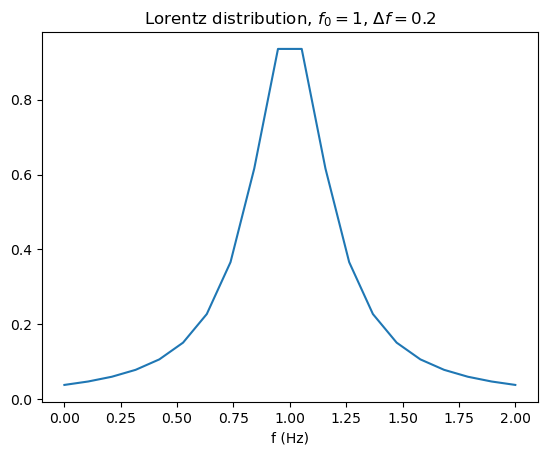

In [61]:
def g(f, f_0, D_f):
    A = 1
    return A / (1 + ((f-f_0)/D_f)**2)

f_0 = 1
f_width = 0.2
N = 20

f_domain = np.linspace(0, 2*f_0, N)
lorentz_distrib = g(f_domain, f_0, f_width)

plt.plot(f_domain, lorentz_distrib)
plt.title(f"Lorentz distribution, $f_0={f_0}$, $\Delta f={f_width}$")
plt.xlabel("f (Hz)")
#plt.ylabel("")
plt.show()

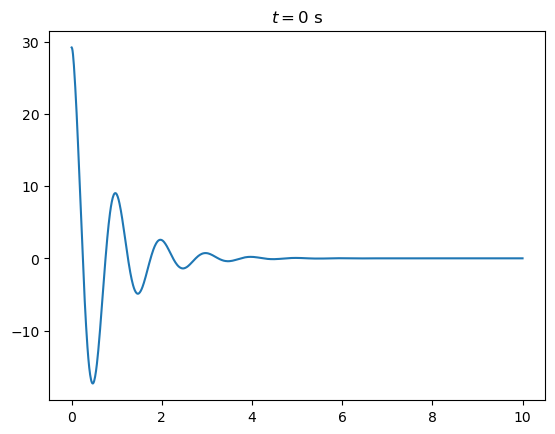

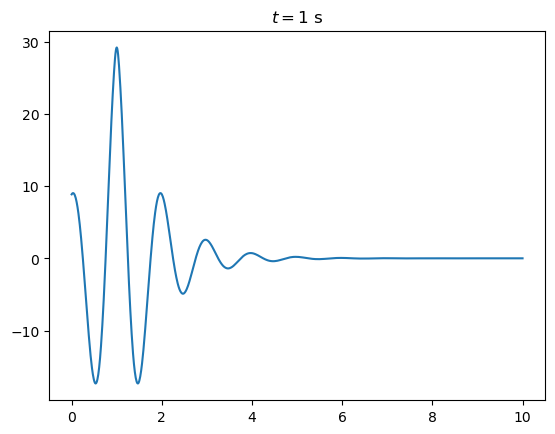

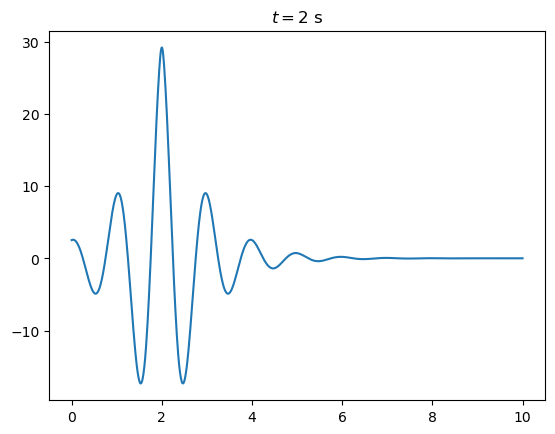

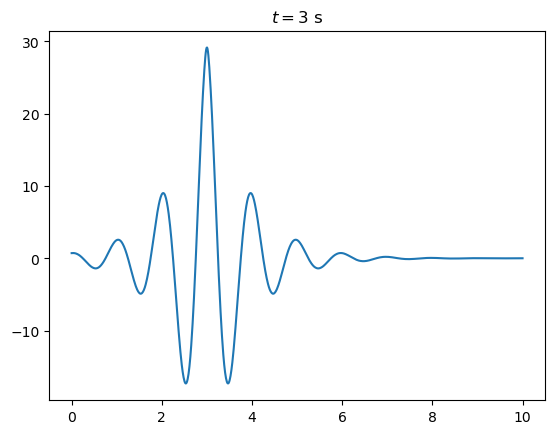

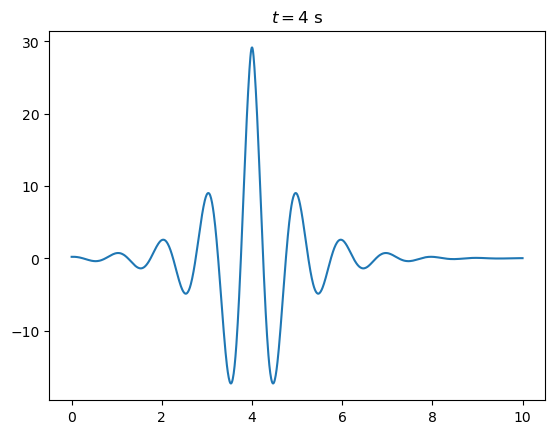

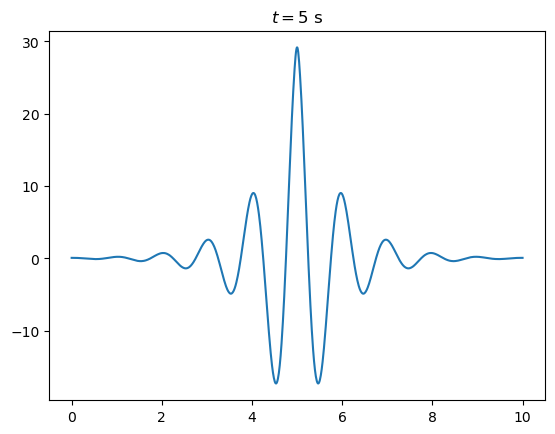

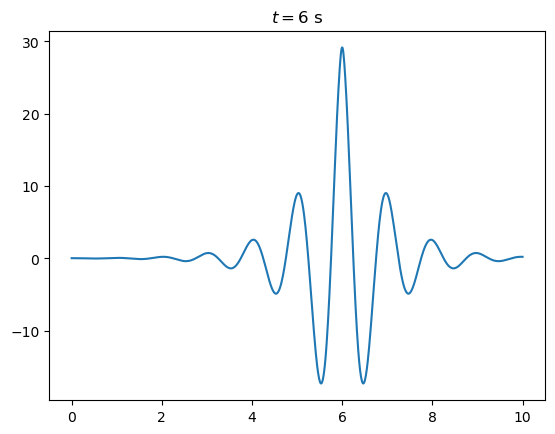

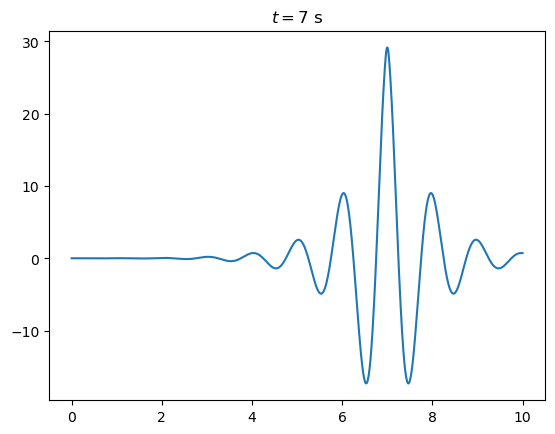

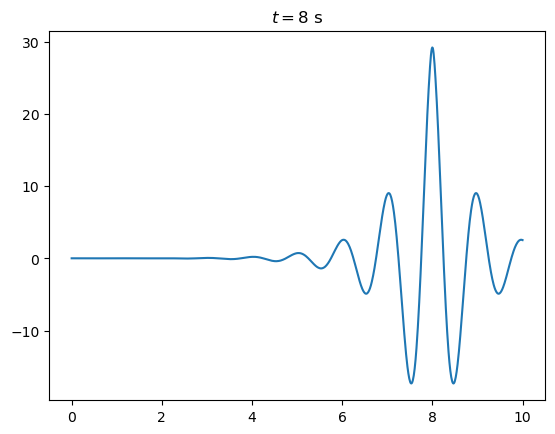

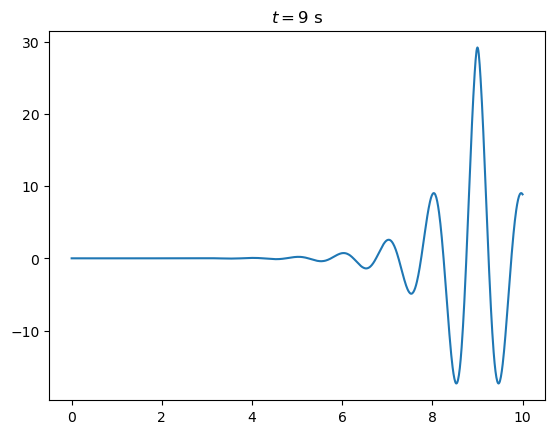

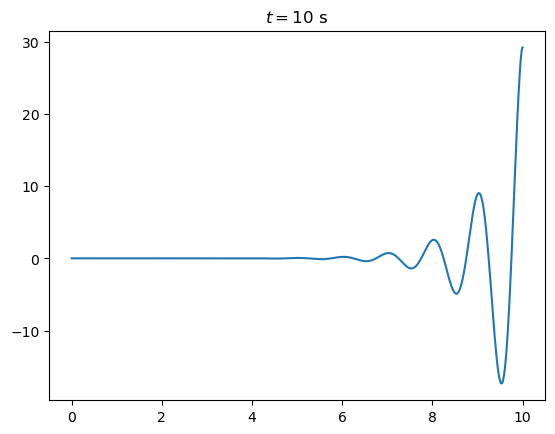

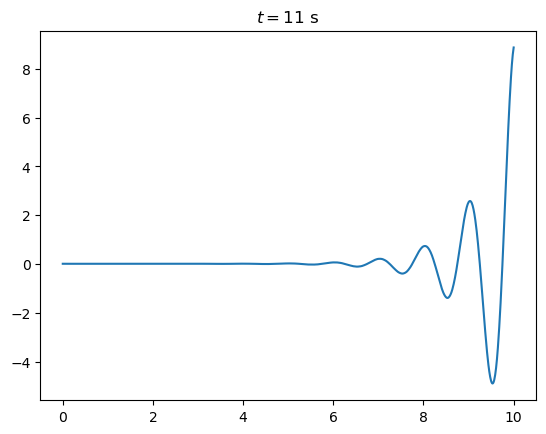

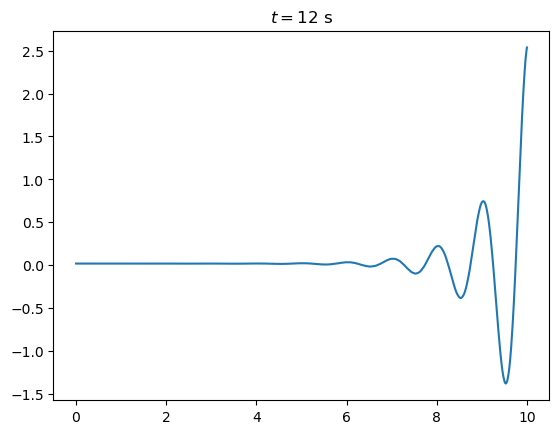

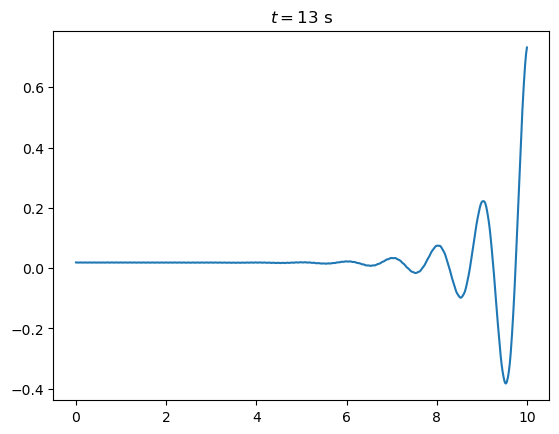

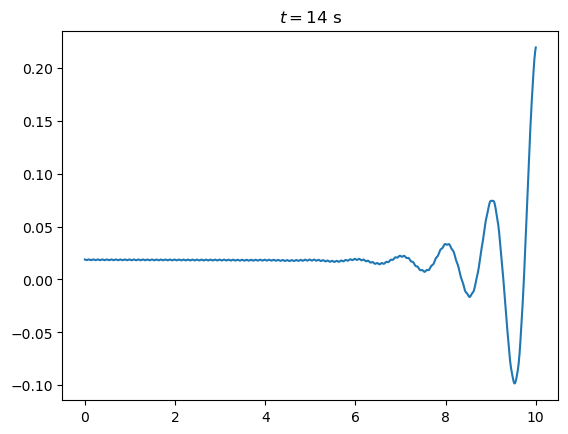

In [67]:
df = f_domain[1]-f_domain[0]
c = 1 # phase speed, light in a vacuum
# fixed t

t_domain = np.arange(0, 15, 1)
for t in t_domain:
#t_1 = 0
    x_domain = np.linspace(0, 10, 1000)

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(x_domain)):
        x = x_domain[i]
        for j in range(len(f_domain)):
            f = f_domain[j]
            phi_1[i] += lorentz_distrib[j]*np.cos(2*np.pi*f*(t - x/c))


    plt.plot(x_domain, phi_1)
    plt.title(f"$t={t}$ s")
    plt.show()

    



## N = 200

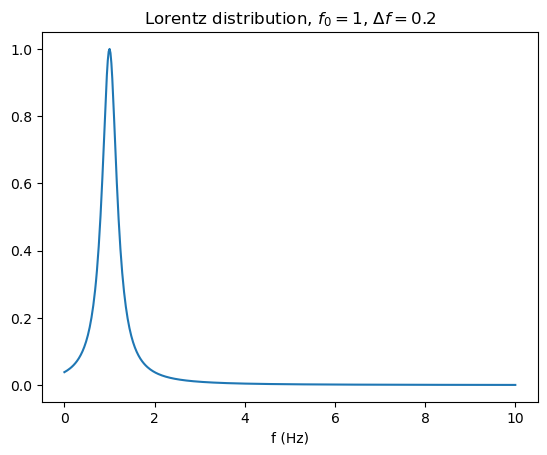

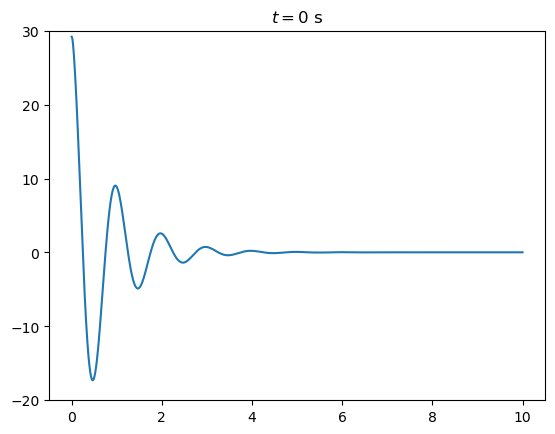

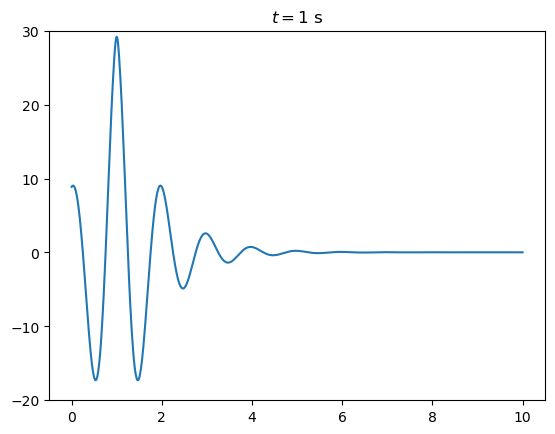

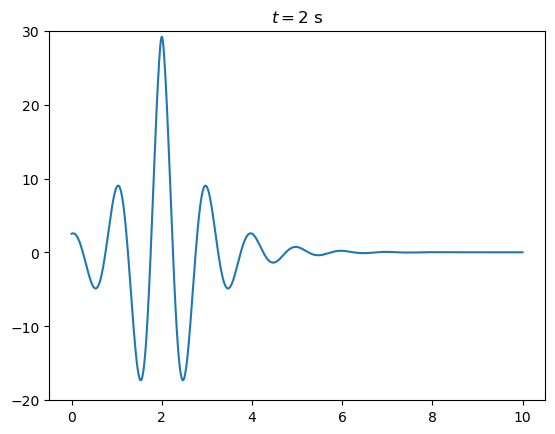

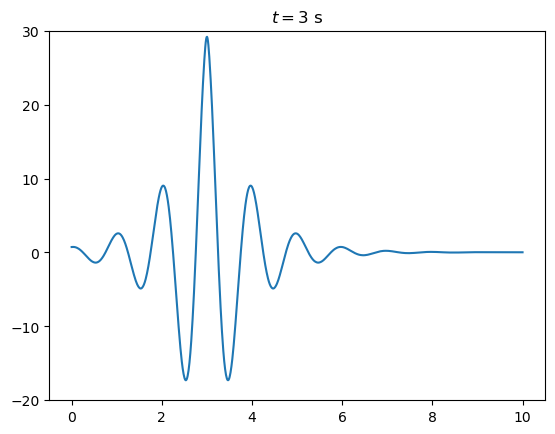

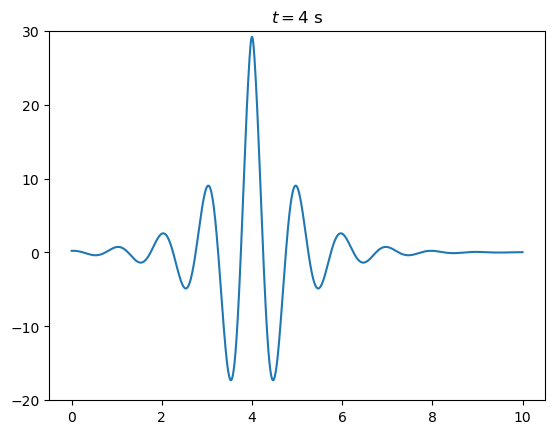

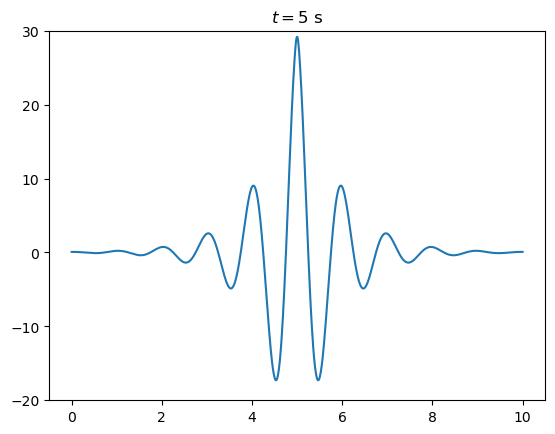

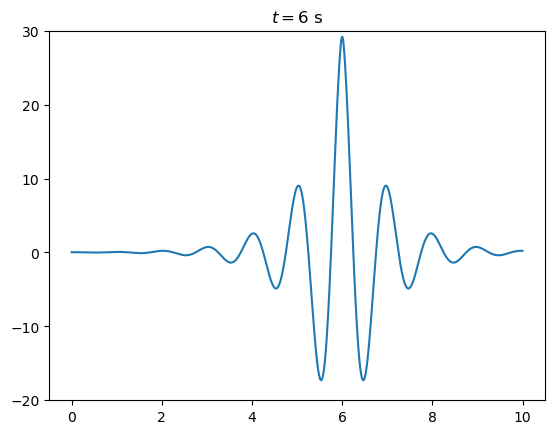

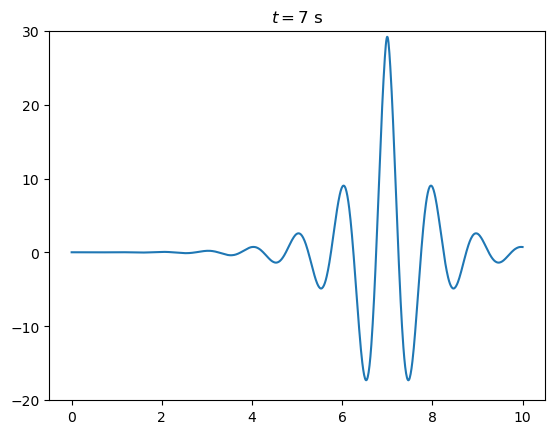

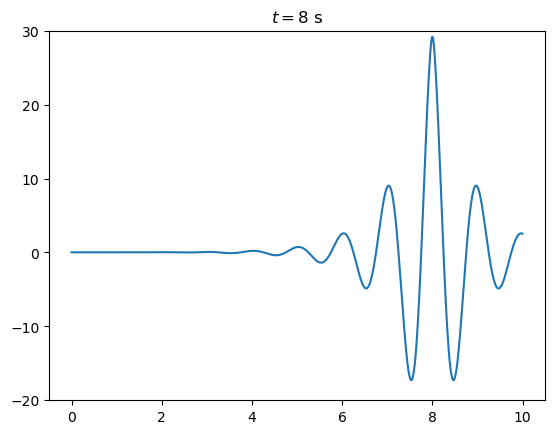

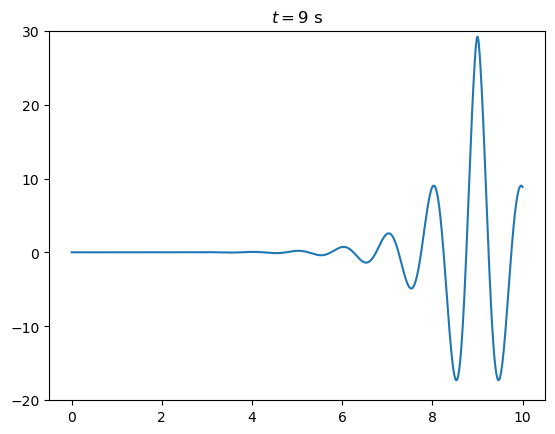

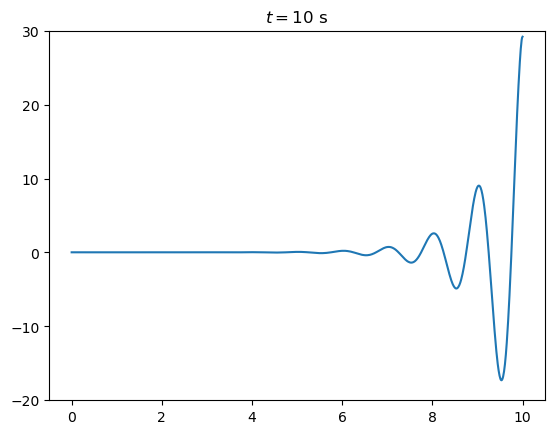

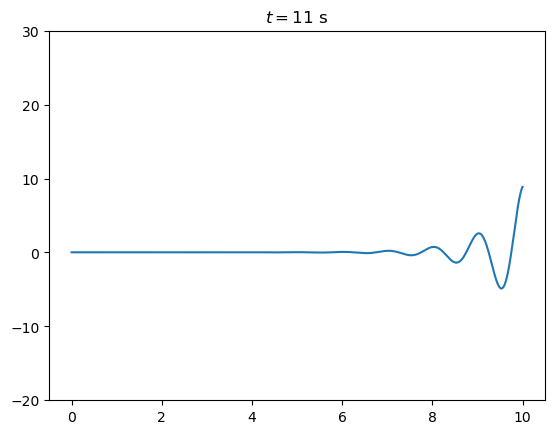

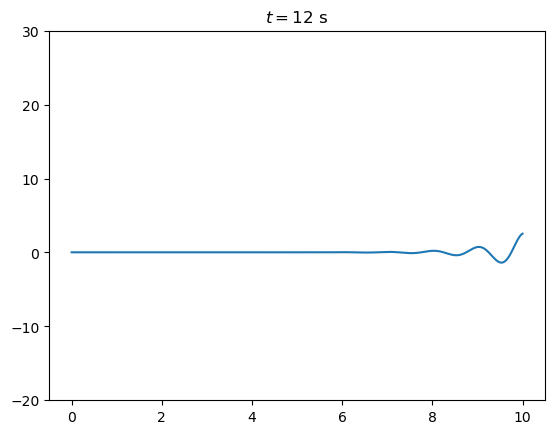

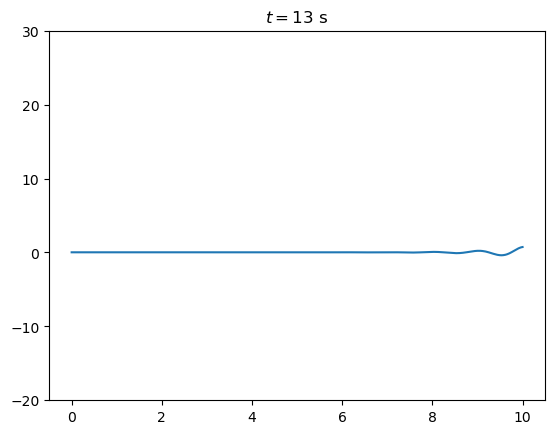

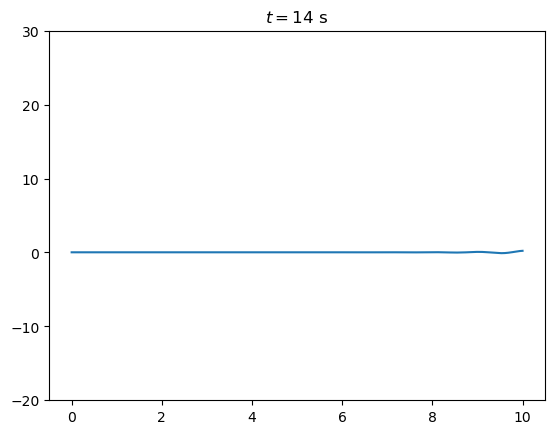

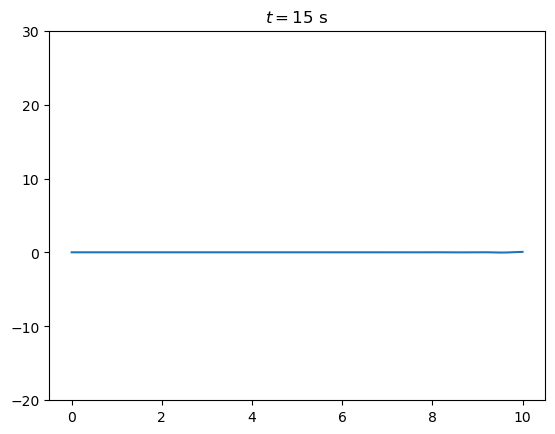

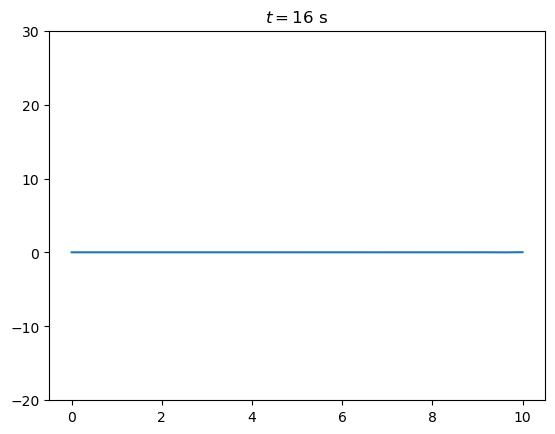

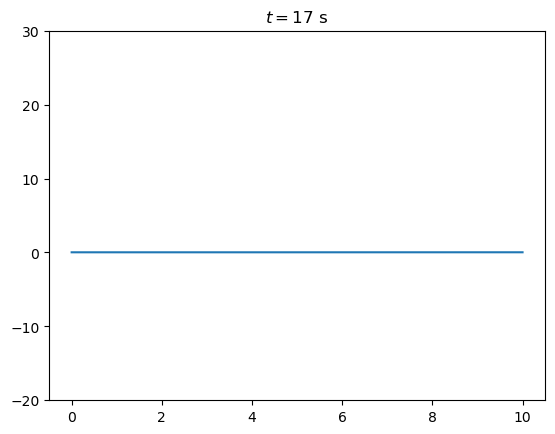

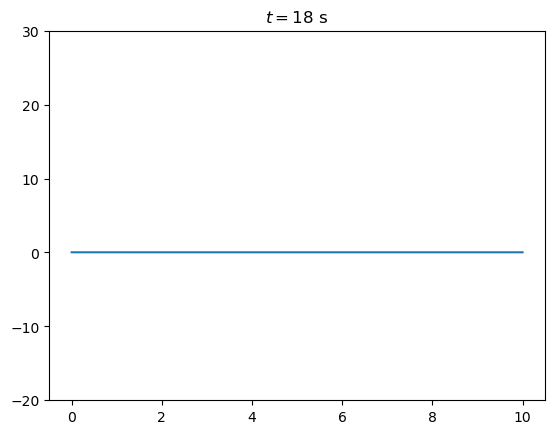

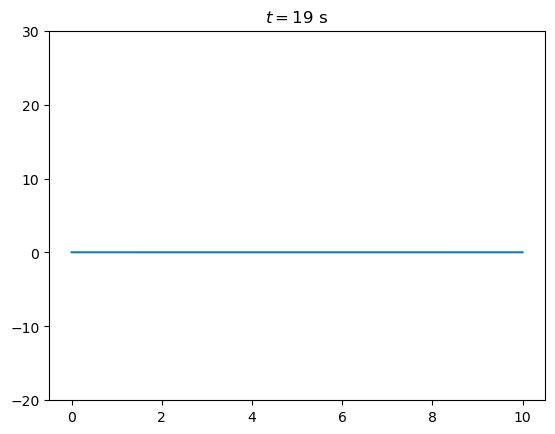

In [66]:
N = 500

f_domain = np.linspace(0, 10*f_0, N)
lorentz_distrib = g(f_domain, f_0, f_width)

plt.plot(f_domain, lorentz_distrib)
plt.title(f"Lorentz distribution, $f_0={f_0}$, $\Delta f={f_width}$")
plt.xlabel("f (Hz)")
#plt.ylabel("")
plt.show()

df = f_domain[1]-f_domain[0]
c = 1 # phase speed
# fixed t

t_domain = np.arange(0, 20, 1)
for t in t_domain:
#t_1 = 0
    x_domain = np.linspace(0, 10, 1000)

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(x_domain)):
        x = x_domain[i]
        for j in range(len(f_domain)):
            f = f_domain[j]
            phi_1[i] += lorentz_distrib[j]*np.cos(2*np.pi*f*(t - x/c))


    plt.plot(x_domain, phi_1)
    plt.title(f"$t={t}$ s")
    plt.ylim((-20, 30))
    plt.show()


In [69]:
from matplotlib.animation import FuncAnimation

In [91]:
N = 50

f_domain = np.linspace(0, 2*f_0, N)
lorentz_distrib = g(f_domain, f_0, f_width)

'''
fig = plt.figure()
ax = plt.axes(xlim=(-1, 11), ylim=(-20, 30))
line, = ax.plot([], [], lw=3)


def init():
    line.set_data([], [])
    return line,


def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
'''
                               
df = f_domain[1]-f_domain[0]
c = 1 # phase speed
# fixed t
#alpha = 0.1

FPS = 20
rate = 1/FPS
t_domain = np.arange(0, 4, rate)

PHI_1 = [] # time series
for t in t_domain:
#t_1 = 0
    x_domain = np.linspace(0, 10, 1000)

    phi_x = np.zeros(len(x_domain))
    for i in range(len(x_domain)):
        x = x_domain[i]
        for j in range(len(f_domain)):
            k = 2*np.pi*f/c
            f = f_domain[j]
            phi_x[i] += lorentz_distrib[j]*np.cos(2*np.pi*f*t - k*x)
    PHI_1.append(phi_x)

    #plt.plot(x_domain, phi_1)
    #plt.title(f"$t={t}$ s")
    #plt.ylim((-20, 30))
    #plt.show()

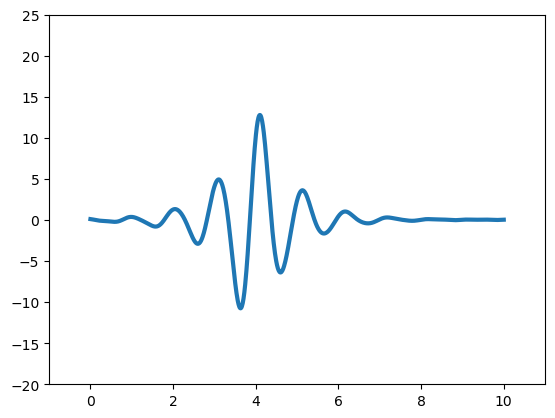

In [93]:
fig = plt.figure()
ax = plt.axes(xlim=(-1, 11), ylim=(-20, 25))
line, = ax.plot([], [], lw=3)


def init():
    line.set_data([], [])
    return line,


def animate(i):
    phi_x = PHI_1[i]
    line.set_data(x_domain, phi_x)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(PHI_1), interval=FPS/2, blit=True)


anim.save(f'figs/wave_packet_ndiff_{N=}_{c=}.gif', writer='imagemagick')

#### It does seem to tend towards an ideal wave packet

**Dispersif medium**

In the case of light:
$$n(\lambda) = A + \frac{B}{\lambda^2} + o(1/\lambda^2)$$

where $n$ is the refractive index $n = \frac{c}{v_{\phi}}$, so there is a visible dependency between wavelength and phase velocity


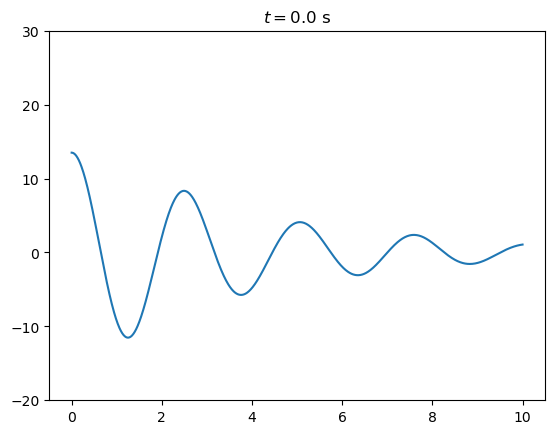

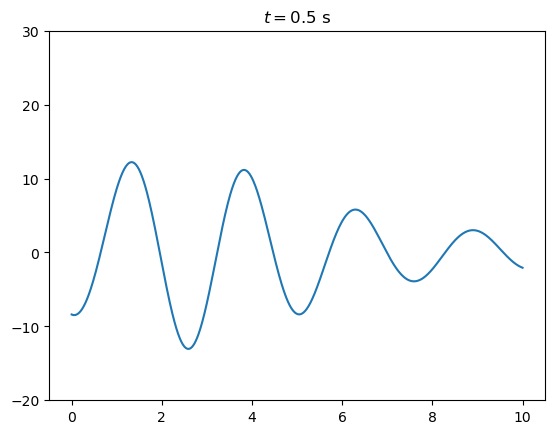

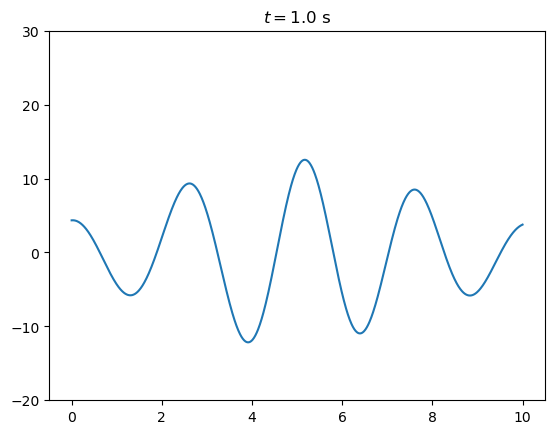

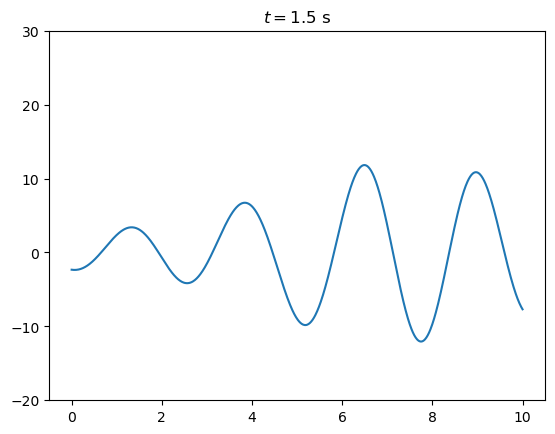

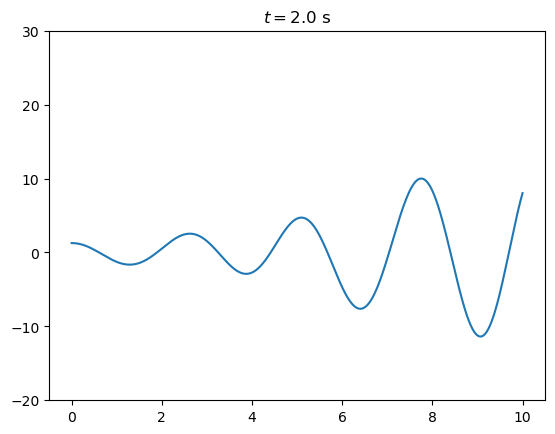

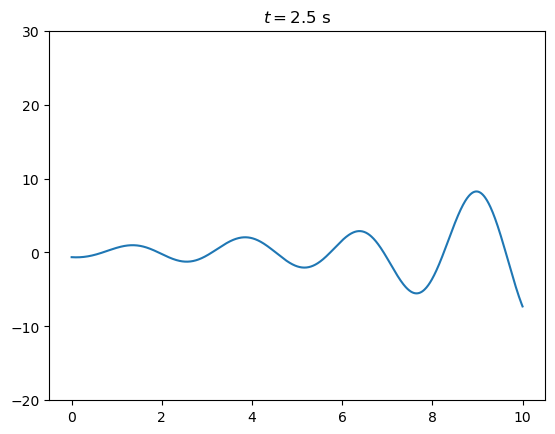

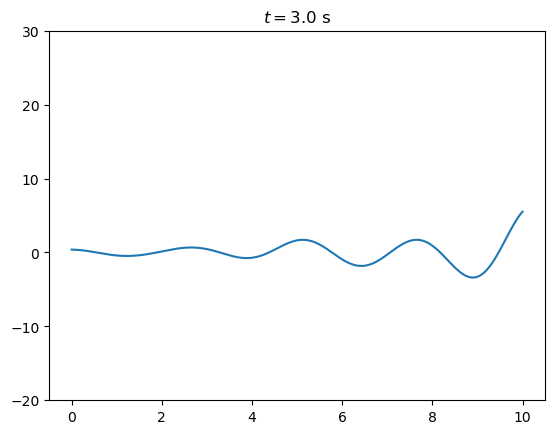

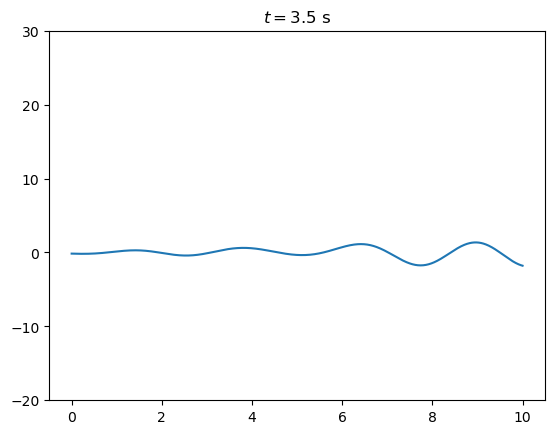

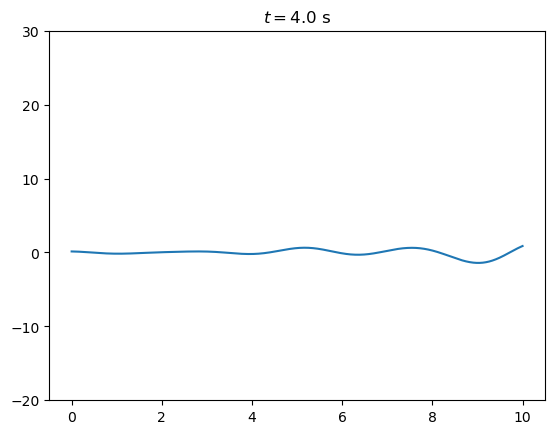

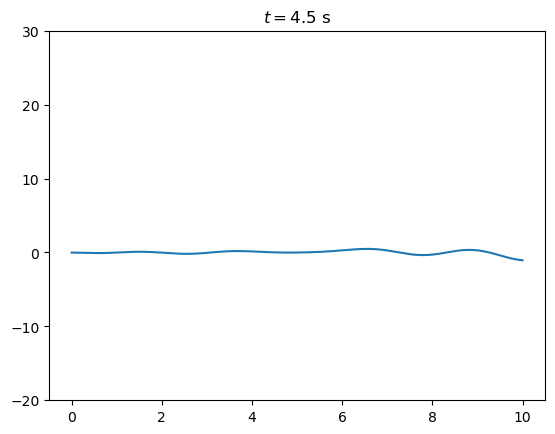

In [72]:
N = 50

f_domain = np.linspace(0, 2*f_0, N)
lorentz_distrib = g(f_domain, f_0, f_width)

#plt.plot(f_domain, lorentz_distrib)
#plt.title(f"Lorentz distribution, $f_0={f_0}$, $\Delta f={f_width}$")
#plt.xlabel("f (Hz)")
#plt.ylabel("")
#plt.show()


df = f_domain[1]-f_domain[0]
#c = 1 # phase speed
# fixed t

t_domain = np.arange(0, 5, 0.5)
for t in t_domain:
#t_1 = 0
    x_domain = np.linspace(0, 10, 1000)

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(x_domain)):
        x = x_domain[i]
        for j in range(len(f_domain)):
            k = np.sqrt(2*np.pi*f)
            f = f_domain[j]
            phi_1[i] += lorentz_distrib[j]*np.cos(2*np.pi*f*t - k*x)


    plt.plot(x_domain, phi_1)
    plt.title(f"$t={t}$ s")
    plt.ylim((-20, 30))
    plt.show()

In [89]:
N = 50

f_domain = np.linspace(0, 2*f_0, N)
lorentz_distrib = g(f_domain, f_0, f_width)

'''
fig = plt.figure()
ax = plt.axes(xlim=(-1, 11), ylim=(-20, 30))
line, = ax.plot([], [], lw=3)


def init():
    line.set_data([], [])
    return line,


def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
'''
                               
df = f_domain[1]-f_domain[0]
#c = 1 # phase speed
# fixed t
alpha = 0.1

FPS = 20
rate = 1/FPS
t_domain = np.arange(0, 4, rate)

PHI = [] # time series
for t in t_domain:
#t_1 = 0
    x_domain = np.linspace(0, 10, 1000)

    phi_x = np.zeros(len(x_domain))
    for i in range(len(x_domain)):
        x = x_domain[i]
        for j in range(len(f_domain)):
            k = np.sqrt(2*np.pi*f/alpha)
            f = f_domain[j]
            phi_x[i] += lorentz_distrib[j]*np.cos(2*np.pi*f*t - k*x)
    PHI.append(phi_x)

    #plt.plot(x_domain, phi_1)
    #plt.title(f"$t={t}$ s")
    #plt.ylim((-20, 30))
    #plt.show()

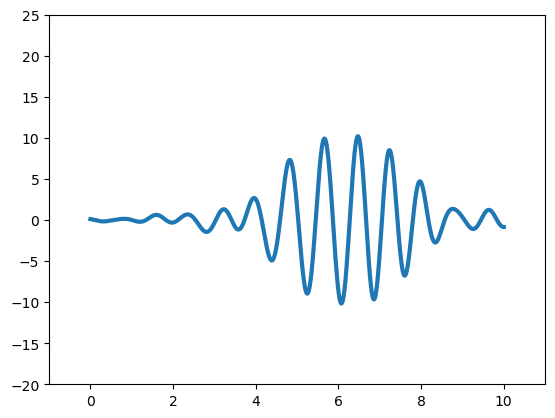

In [94]:
#print(len(PHI))

fig = plt.figure()
ax = plt.axes(xlim=(-1, 11), ylim=(-20, 25))
line, = ax.plot([], [], lw=3)


def init():
    line.set_data([], [])
    return line,


def animate(i):
    phi_x = PHI[i]
    line.set_data(x_domain, phi_x)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(PHI), interval=FPS/2, blit=True)


anim.save(f'figs/wave_packet_diff_{N=}_{alpha=}.gif', writer='imagemagick')

We indeed notice that the curve that modulates the plane wave moves at a different speed ; phase speed seems to be faster than group speed

#### Longer time interval to check wave packet spreading

In [98]:
N = 100

f_domain = np.linspace(0, 2*f_0, N)
lorentz_distrib = g(f_domain, f_0, f_width)
                               
df = f_domain[1]-f_domain[0]
#c = 1 # phase speed
# fixed t
alpha = 0.1

FPS = 20
rate = 1/FPS
t_domain = np.arange(0, 12, rate)

PHI_2 = [] # time series
for t in t_domain:
#t_1 = 0
    x_domain = np.linspace(0, 30, 1000)

    phi_x = np.zeros(len(x_domain))
    for i in range(len(x_domain)):
        x = x_domain[i]
        for j in range(len(f_domain)):
            k = np.sqrt(2*np.pi*f/alpha)
            f = f_domain[j]
            phi_x[i] += lorentz_distrib[j]*np.cos(2*np.pi*f*t - k*x)
    PHI_2.append(phi_x)

    #plt.plot(x_domain, phi_1)
    #plt.title(f"$t={t}$ s")
    #plt.ylim((-20, 30))
    #plt.show()

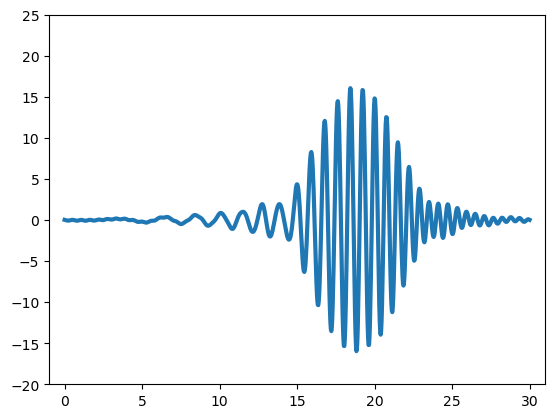

In [99]:
#print(len(PHI))

fig = plt.figure()
ax = plt.axes(xlim=(-1, 31), ylim=(-20, 25))
line, = ax.plot([], [], lw=3)


def init():
    line.set_data([], [])
    return line,


def animate(i):
    phi_x = PHI_2[i]
    line.set_data(x_domain, phi_x)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(PHI_2), interval=FPS/2, blit=True)


anim.save(f'figs/spread_wave_packet_diff_{N=}_{alpha=}.gif', writer='imagemagick')

The wave packet does visibly spread out over a greater distance as time passes

Credits to @parulnith for their very useful code snippet
https://gist.github.com/parulnith/5d82f66f38704e09456fbc33ed5b67ae

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


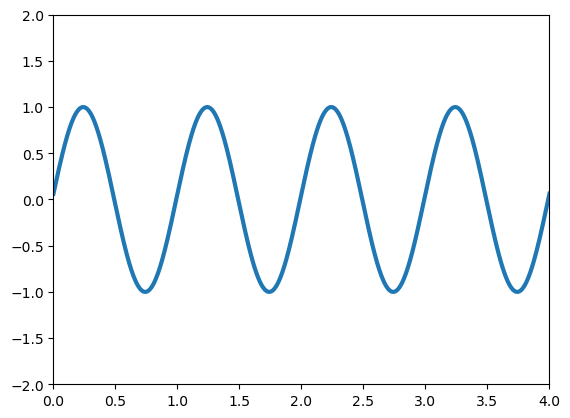

In [73]:

from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    print(i)
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('figs/sine_wave.gif', writer='imagemagick')